<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center><font size=8>Project 6 : RENEWIND </center></font></h1>
<h1><center><font size=6>MODEL TUNING</center></font></h1>

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Step 1 : Importing libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set size and style of the seaborn plots
sns.set_style("darkgrid")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    make_scorer,
)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Step 2 : Loading the Data

In [ ]:
# mounting the data from Google Drive

from google.colab import drive
drive.mount('/content/drive')

# loading the dataset(s)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project 6/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project 6/Test.csv')

Mounted at /content/drive


In [ ]:
# copying the training data to another variable to avoid any changes to original data
data = df.copy()

In [ ]:
# let's create a copy of the testing data
data_test = df_test.copy()

## Step 3: Perform exploratory data analysis (EDA)

## Data Overview & Quality Check

### View the first and last 5 rows of the dataset

In [ ]:
# training dataset
data.head()

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0 -4.4646 -4.6791  3.1015  0.5061 -0.2211 -2.0325 -2.9109  0.0507 -1.5224   
1  3.3659  3.6534  0.9097 -1.3675  0.3320  2.3589  0.7326 -4.3321  0.5657   
2 -3.8318 -5.8244  0.6340 -2.4188 -1.7738  1.0168 -2.0989 -3.1732 -2.0819   
3  1.6181  1.8883  7.0461 -1.1473  0.0831 -1.5298  0.2073 -2.4936  0.3449   
4 -0.1114  3.8725 -3.7584 -2.9829  3.7927  0.5450  0.2054  4.8490 -1.8549   

      V10     V11     V12     V13     V14     V15     V16     V17     V18  \
0  3.7619 -5.7147  0.7359  0.9813  1.4179 -3.3758 -3.0473  0.3062  2.9141   
1 -0.1011  1.9145 -0.9515 -1.2553 -2.7065  0.1932 -4.7694 -2.2053  0.9077   
2  5.3926 -0.7707  1.1067  1.1443  0.9433 -3.1638 -4.2478 -4.0389  3.6885   
3  2.1186 -3.0530  0.4597  2.7045 -0.6361 -0.4537 -3.1740 -3.4043 -1.2815   
4 -6.2200  1.9983  4.7238  0.7091 -1.9894 -2.6327  4.1844  2.2454  3.7345   

      V19     V20     V21     V22     V23     V24     V25     V26     V27  \
0  2.2700  4.3949 -2.3883  0.6464 -1.1905  3.1330  0.6653 -2.5108 -0.0367   
1  0.7569 -5.8337 -3.0651  1.5966 -1.7573  1.7664 -0.2671  3.6250  1.5003   
2  3.3112  1.0590 -2.1430  1.6501 -1.6606  1.6799 -0.4508 -4.5507  3.7388   
3  1.5821 -1.9518 -3.5166 -1.2060 -5.6279 -1.8177  2.1241  5.2946  4.7481   
4 -6.3128 -5.3799 -0.8867  2.0617  9.4456  4.4900 -3.9451  4.5821 -8.7804   

      V28     V29     V30     V31     V32     V33      V34    V35     V36  \
0  0.7262 -3.9822 -1.0726  1.6671  3.0597 -1.6904   2.8463 2.2352  6.6675   
1 -0.5857  0.7830 -0.2012  0.0249 -1.7955  3.0328  -2.4675 1.8946 -2.2978   
2  1.1344 -2.0335  0.8408 -1.6004 -0.2571  0.8035   4.0862 2.2921  5.3608   
3 -2.3085 -3.9630 -6.0287  4.9488 -3.5844 -2.5775   1.3638 0.6227  5.5501   
4 -3.3830  5.1065  6.7875  2.0442  8.2659  6.6292 -10.0687 1.2230 -3.2298   

      V37     V38     V39     V40  Target  
0  0.4438 -2.3692  2.9506 -3.4803       0  
1 -1.7310  5.9088 -0.3863  0.6162       0  
2  0.3520  2.9400  3.8392 -4.3094       0  
3 -1.5268  0.1389  3.1014 -1.2774       0  
4  1.6869 -2.1639 -3.6446  6.5103       0

In [ ]:
data.tail()

V1       V2      V3      V4      V5      V6      V7      V8  \
19995 -2.0713  -1.0883 -0.7962 -3.0117 -2.2875  2.8073  0.4814  0.1052   
19996  2.8903   2.4831  5.6439  0.9371 -1.3809  0.4121 -1.5934 -5.7625   
19997 -3.8970  -3.9424 -0.3514 -2.4175  1.1075 -1.5276 -3.5199  2.0548   
19998 -3.1873 -10.0517  5.6960 -4.3701 -5.3548 -1.8730 -3.9472  0.6794   
19999 -2.6869   1.9612  6.1371  2.6001  2.6572 -4.2909 -2.3443  0.9740   

           V9     V10     V11     V12    V13     V14     V15      V16     V17  \
19995 -0.5866 -2.8994  8.8684  1.7172 1.3578 -1.7771  0.7098   4.9449 -3.1005   
19996  2.1501  0.2723 -2.0948 -1.5258 0.0716 -3.5401 -2.7620 -10.6322 -0.4952   
19997 -0.2340 -0.3577 -3.7820  2.1800 6.1118  1.9847 -8.3300  -1.6392 -0.9150   
19998 -2.3893  5.4568  1.5830  3.5715 9.2266  2.5536 -7.0391  -0.9936 -9.6649   
19999 -1.0275  0.4974 -9.5891  3.1766 1.0545 -1.4159 -4.6686  -5.4054  3.7198   

          V18     V19     V20     V21     V22     V23     V24     V25     V26  \
19995 -1.1992 -1.0846 -0.3650  3.1312 -3.9481 -3.5785 -8.1391 -1.9369 -1.3277   
19996  1.7201  3.8716 -1.2096 -8.2221  2.1209 -5.4918  1.4523  1.4500  3.6847   
19997  5.6723 -3.9242  2.1332 -4.5020  2.7772  5.7279  1.6198 -1.6997 -0.0419   
19998  1.1552  3.8769  3.5236 -7.0153 -0.1320 -3.4462 -4.8014 -0.8757 -3.8119   
19999  2.8929  2.3286  1.4577 -6.4285  1.8182  0.8059  7.7860  0.3309  5.2574   

          V27     V28     V29     V30     V31     V32     V33     V34     V35  \
19995 -0.4027 -1.7348  9.9965  6.9554 -3.9385 -8.2740  5.7450  0.5890 -0.6500   
19996  1.0768 -0.3842 -0.8386 -0.7483 -1.0886 -4.1591  1.1815 -0.7424  5.3690   
19997 -2.9231 -2.7602 -2.2538  2.5520  0.9819  7.1122  1.4761 -3.9537  1.8556   
19998  5.4221 -3.7323  0.6088  5.2565  1.9148  0.4028  3.1637  3.7521  8.5299   
19999 -4.8674 -0.8189 -5.6674 -2.8610  4.6743  6.6208 -1.9888 -1.3489  3.9518   

          V36     V37     V38    V39     V40  Target  
19995 -3.0432  2.2165  0.6087 0.1782  2.9278       1  
19996 -0.6930 -1.6690  3.6600 0.8199 -1.9873       0  
19997  5.0292  2.0826 -6.4093 1.4771 -0.8741       0  
19998  8.4506  0.2040 -7.1299 4.2494 -6.1123       0  
19999  5.4497 -0.4554 -2.2021 1.6782 -1.9744       0

In [ ]:
# test dataset
data_test.head()

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0 -0.6135 -3.8196  2.2023  1.3004 -1.1849 -4.4960 -1.8358  4.7230  1.2061   
1  0.3896 -0.5123  0.5271 -2.5768 -1.0168  2.2351 -0.4413 -4.4057 -0.3329   
2 -0.8749 -0.6406  4.0842 -1.5905  0.5259 -1.9576 -0.6954  1.3473 -1.7323   
3  0.2384  1.4586  4.0145  2.5345  1.1970 -3.1173 -0.9240  0.2695  1.3224   
4  5.8282  2.7683 -1.2345  2.8093 -1.6416 -1.4067  0.5686  0.9650  1.9184   

      V10     V11     V12     V13     V14     V15     V16     V17     V18  \
0 -0.3419 -5.1229  1.0170  4.8185  3.2690 -2.9843  1.3874  2.0320 -0.5116   
1  1.9668  1.7965  0.4105  0.6383 -1.3896 -1.8834 -5.0179 -3.8272  2.4181   
2  0.4665 -4.9282  3.5651 -0.4493 -0.6562 -0.1665 -1.6302  2.2919  2.3965   
3  0.7023 -5.5783 -0.8507  2.5905  0.7674 -2.3908 -2.3420  0.5719 -0.9338   
4 -2.7749 -0.5300  1.3745 -0.6509 -1.6795 -0.3792 -4.4431  3.8939 -0.6076   

      V19     V20     V21    V22     V23     V24     V25     V26     V27  \
0 -1.0231  7.3387 -2.2422 0.1555  2.0538 -2.7723  1.8514 -1.7887 -0.2773   
1  1.7623 -3.2423 -3.1930 1.8575 -1.7080  0.6334 -0.5879  0.0837  3.0139   
2  0.6013  1.7935 -2.1202 0.4820 -0.8407  1.7902  1.8744  0.3639 -0.1691   
3  0.5087  1.2107 -3.2595 0.1046 -0.6589  1.4981  1.1003  4.1430 -0.2484   
4  2.9449  0.3672 -5.7891 4.5975  4.4503  3.2249  0.3967  0.2478 -2.3620   

      V28     V29     V30     V31     V32     V33     V34    V35     V36  \
0 -1.2551 -3.8329 -1.5045  1.5868  2.2912 -5.4114  0.8701 0.5745  4.1572   
1 -0.1823  0.2239  0.8652 -1.7822 -2.4749  2.4936  0.3152 2.0593  0.6839   
2 -0.4838 -2.1190 -2.1566  2.9073 -1.3189 -2.9975  0.4597 0.6198  5.6315   
3 -1.1365 -5.3558 -4.5459  3.8087  3.5179 -3.0741 -0.2842 0.9546  3.0293   
4  1.0794 -0.4731  2.2428 -3.5914  1.7738 -1.5016 -2.2267 4.7768 -6.5597   

      V37      V38     V39     V40  Target  
0  1.4281 -10.5113  0.4547 -1.4484       0  
1 -0.4855   5.1284  1.7207 -1.4882       0  
2  1.3235  -1.7522  1.8083  1.6757       0  
3 -1.3672  -3.4121  0.9060 -2.4509       0  
4 -0.8056  -0.2760 -3.8582 -0.5377       0

In [ ]:
data_test.tail()

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
4995 -5.1205  1.6348  1.2513  4.0359  3.2912 -2.9322 -1.3287  1.7541 -2.9846   
4996 -5.1725  1.1717  1.5791  1.2199  2.5296 -0.6686 -2.6183 -2.0005  0.6338   
4997 -1.1141 -0.4036 -1.7649 -5.8795  3.5716  3.7108 -2.4830 -0.3076 -0.9219   
4998 -1.7032  0.6146  6.2205 -0.1041  0.9559 -3.2787 -1.6339 -0.1039  1.3882   
4999 -0.6037  0.9595 -0.7210  8.2296 -1.8156 -2.2755 -2.5745 -1.0415  4.1296   

         V10     V11     V12     V13     V14     V15     V16     V17    V18  \
4995  1.2486 -6.8777  3.7152 -2.5118 -1.3950 -2.5541 -2.1974  4.7717 2.4029   
4996 -0.5789 -3.6712  0.4602  3.3206 -1.0750 -7.1125 -4.3559 -0.0011 3.6984   
4997 -2.9991 -0.1117 -1.9769 -1.6230 -0.9455 -2.7351 -0.8130  0.6098 8.1488   
4998 -1.0656 -7.9698  2.2621  3.1340 -0.4858 -3.4983 -4.5617  3.1358 2.5364   
4999 -2.7313 -3.2924 -1.6738  0.4645 -1.6459 -5.2634 -7.9876  6.4805 0.2263   

         V19     V20     V21     V22     V23     V24     V25     V26     V27  \
4995  3.7918  0.4868 -2.0281  1.7779  3.6680 11.3749 -1.9771  2.2516 -7.3185   
4996 -0.8464 -0.2223 -3.6450  0.7360  0.9257  3.2777 -2.2768  4.4576 -4.5429   
4997 -9.1992 -3.8725 -0.2957  1.4684  2.8843  2.7921 -1.1357  1.1979 -4.3417   
4998 -0.7922  4.3984 -4.0730 -0.0376 -2.3713 -1.5420  2.9079  3.2145 -0.1687   
4999  4.9633  6.7520 -6.3058  3.2705  1.8972  3.2708 -0.6371 -0.9250 -6.7589   

         V28     V29     V30     V31     V32     V33      V34     V35     V36  \
4995  1.9070 -3.7337 -0.0125  2.1205  9.9791  0.0634   0.2173  3.0364  2.1093   
4996 -1.3480 -1.7794  0.3522 -0.2143  4.4239  2.6038  -2.1522  0.9174  2.1566   
4997 -2.8694  4.1241  4.1967  3.4707  3.7918  7.4815 -10.0614 -0.3872  1.8485   
4998 -1.5413 -4.7244 -5.5250  1.6680 -4.1004 -5.9493   0.5504 -1.5736  6.8239   
4999  2.9902 -0.8138  3.4990 -8.4347  2.3698 -1.0624   0.7908  4.9520 -7.4408   

         V37     V38     V39     V40  Target  
4995 -0.5574  1.9387  0.5127 -2.6942       0  
4996  0.4670  0.4701  2.1968 -2.3765       0  
4997  1.8182 -1.2456 -1.2609  7.4747       0  
4998  2.1393 -4.0362  3.4361  0.5792       0  
4999 -0.0695 -0.9181 -2.2912 -5.3629       0

- Both train and test datasets have both positive and negative values (sensor data) in their columns.
- There are 20,000 records in the train dataset and 5000 records in the test dataset.

### Verify shape of the dataset.

In [ ]:
# Checking the number of rows and columns in the training data
data.shape

(20000, 41)

In [ ]:
# Checking the number of rows and columns in the test data
data_test.shape

(5000, 41)

### Verify any duplicates in the dataset.

In [ ]:
# checking the train dataset
data.duplicated().sum()

0

In [ ]:
# checking the test dataset
data_test.duplicated().sum()

0

### Check data types of the columns in the dataset

In [ ]:
data.dtypes     #train dataset

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
V32       float64
V33       float64
V34       float64
V35       float64
V36       float64
V37       float64
V38       float64
V39       float64
V40       float64
Target      int64
dtype: object

In [ ]:
# let's check the count and data types of the columns in the train dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
# let's check the count and data types of the columns in the test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

### Check for Missing Values

In [ ]:
# let's check for missing values in the train data
data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
# let's check for missing values in the test data
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

**Data Overview Observations**
- Data set loaded properly for both train and test data. No issues.
- There are 20,000 records and 41 columns (fields) in train set and 5,000 records and 41 columns (fields) in test set. 
- There are no duplicate records in both the datasets.
- Only columns V1 and V2 in both the train and test sets have missing values, which means we have to carry out data impute. 
- There are 18 null values in both the V1 and V2 columns in the training data and 5 and 6 null values for V1 and V2 respectively in the test dataset.
- All columns other than the target variable (discrete/categorical) are continuous variables.
- Target which is our target variable (dependent variable) should be a binary representation, of either '1' or '0' (True / False).


### Check Statstical Summary

In [ ]:
# let's view the statistical summary of the numerical columns in the train data
data.describe().T

count    mean    std      min     25%     50%     75%     max
V1     19982.0000 -0.2720 3.4416 -11.8765 -2.7371 -0.7479  1.8401 15.4930
V2     19982.0000  0.4404 3.1508 -12.3200 -1.6407  0.4715  2.5440 13.0893
V3     20000.0000  2.4847 3.3890 -10.7081  0.2069  2.2558  4.5662 17.0909
V4     20000.0000 -0.0832 3.4316 -15.0821 -2.3477 -0.1352  2.1306 13.2364
V5     20000.0000 -0.0538 2.1048  -8.6034 -1.5356 -0.1020  1.3405  8.1338
V6     20000.0000 -0.9954 2.0410 -10.2271 -2.3472 -1.0005  0.3803  6.9758
V7     20000.0000 -0.8793 1.7616  -7.9497 -2.0309 -0.9172  0.2237  8.0061
V8     20000.0000 -0.5482 3.2958 -15.6576 -2.6427 -0.3891  1.7230 11.6795
V9     20000.0000 -0.0168 2.1606  -8.5963 -1.4950 -0.0676  1.4092  8.1376
V10    20000.0000 -0.0130 2.1932  -9.8540 -1.4112  0.1010  1.4770  8.1085
V11    20000.0000 -1.8954 3.1243 -14.8321 -3.9224 -1.9212  0.1189 11.8264
V12    20000.0000  1.6048 2.9305 -12.9480 -0.3965  1.5078  3.5715 15.0807
V13    20000.0000  1.5805 2.8747 -13.2282 -0.2235  1.6372  3.4599 15.4196
V14    20000.0000 -0.9506 1.7897  -7.7386 -2.1707 -0.9572  0.2707  5.6707
V15    20000.0000 -2.4150 3.3550 -16.4166 -4.4153 -2.3826 -0.3591 12.2465
V16    20000.0000 -2.9252 4.2217 -20.3742 -5.6342 -2.6827 -0.0950 13.5832
V17    20000.0000 -0.1343 3.3455 -14.0912 -2.2156 -0.0146  2.0688 16.7564
V18    20000.0000  1.1893 2.5923 -11.6440 -0.4039  0.8834  2.5718 13.1799
V19    20000.0000  1.1818 3.3969 -13.4918 -1.0502  1.2791  3.4933 13.2377
V20    20000.0000  0.0236 3.6695 -13.9227 -2.4330  0.0334  2.5124 16.0523
V21    20000.0000 -3.6113 3.5677 -17.9562 -5.9304 -3.5329 -1.2659 13.8405
V22    20000.0000  0.9518 1.6515 -10.1221 -0.1181  0.9747  2.0256  7.4099
V23    20000.0000 -0.3661 4.0319 -14.8661 -3.0988 -0.2621  2.4517 14.4587
V24    20000.0000  1.1344 3.9121 -16.3871 -1.4681  0.9690  3.5460 17.1633
V25    20000.0000 -0.0022 2.0167  -8.2283 -1.3652  0.0251  1.3971  8.2234
V26    20000.0000  1.8738 3.4351 -11.8343 -0.3379  1.9505  4.1300 16.8364
V27    20000.0000 -0.6124 4.3688 -14.9049 -3.6523 -0.8849  2.1892 17.5604
V28    20000.0000 -0.8832 1.9177  -9.2695 -2.1712 -0.8911  0.3759  6.5276
V29    20000.0000 -0.9856 2.6844 -12.5795 -2.7874 -1.1762  0.6298 10.7221
V30    20000.0000 -0.0155 3.0053 -14.7960 -1.8671  0.1843  2.0362 12.5058
V31    20000.0000  0.4868 3.4614 -13.7228 -1.8178  0.4903  2.7307 17.2551
V32    20000.0000  0.3038 5.5004 -19.8765 -3.4205  0.0521  3.7617 23.6332
V33    20000.0000  0.0498 3.5753 -16.8984 -2.2429 -0.0662  2.2551 16.6925
V34    20000.0000 -0.4627 3.1838 -17.9851 -2.1370 -0.2550  1.4369 14.3582
V35    20000.0000  2.2296 2.9371 -15.3498  0.3362  2.0986  4.0644 15.2911
V36    20000.0000  1.5148 3.8009 -14.8332 -0.9438  1.5665  3.9839 19.3296
V37    20000.0000  0.0113 1.7882  -5.4784 -1.2558 -0.1284  1.1755  7.4670
V38    20000.0000 -0.3440 3.9481 -17.3750 -2.9876 -0.3168  2.2794 15.2899
V39    20000.0000  0.8907 1.7531  -6.4389 -0.2723  0.9193  2.0575  7.7599
V40    20000.0000 -0.8756 3.0122 -11.0239 -2.9402 -0.9208  1.1199 10.6543
Target 20000.0000  0.0555 0.2290   0.0000  0.0000  0.0000  0.0000  1.0000

- As all the columns are have no explicit column names (ciphered),not much interpretation can be inferred from the summary abve.
- However, what can be observed is that :
    - All columns range from negative to positive values.
    - There are missing values in V1 and V2 count
    - The range of values varies across different variables. For example, V1 ranges from -11.8765 to 15.4930, while V21 ranges from -17.9562 to 13.8405.
    - The "Target" variable values range from 0 to 1. It seems to be a binary variable with mostly zero values (based on the 25th, 50th, and 75th percentiles being 0).
    - The variables have different scales and ranges, as indicated by the standard deviations. Some variables have higher standard deviations compared to others, indicating greater variability in their values.
    - The variable "V1" has a mean of -0.2720 and a median of -0.7479. The fact that the mean is smaller than the median suggests that the distribution of "V1" is negatively skewed.
    -  the Target variable, the mean is slightly larger than the median, suggesting positive skewness.
    - there are some variables such as V12, V18 and V19, where the mean and median values are relatively close, but the values of the mean are slightly larger than the corresponding medians. This suggests a slight right-skewness in the distributions of these variables.

# **Exploratory Data Analysis (EDA)**

### PREDEFINED FUNCTIONS

- lets place some predefined functions here to be used during EDA

**Plotting histograms and boxplots for all the variables**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go (Univariate Analysis)

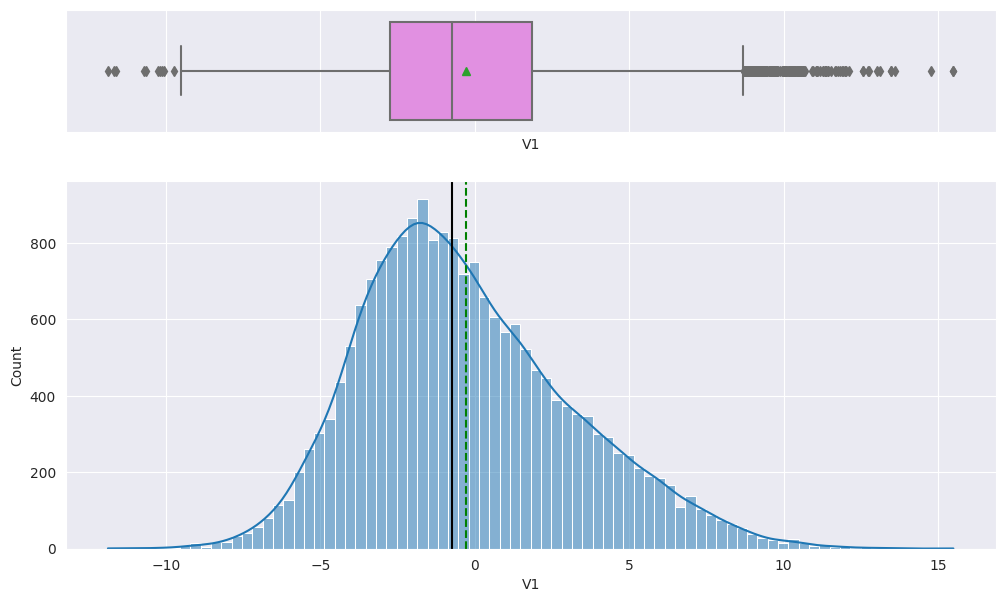

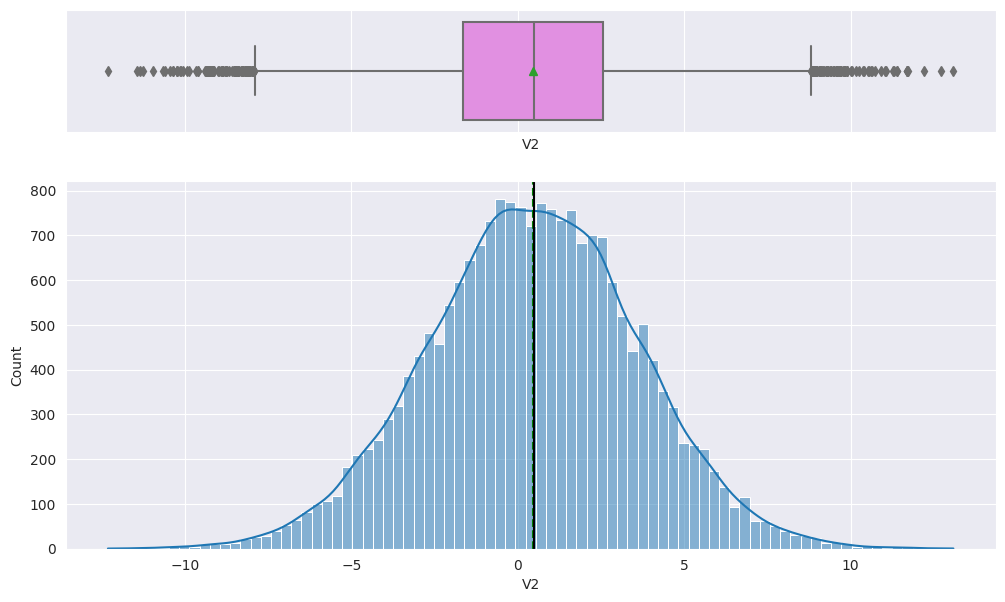

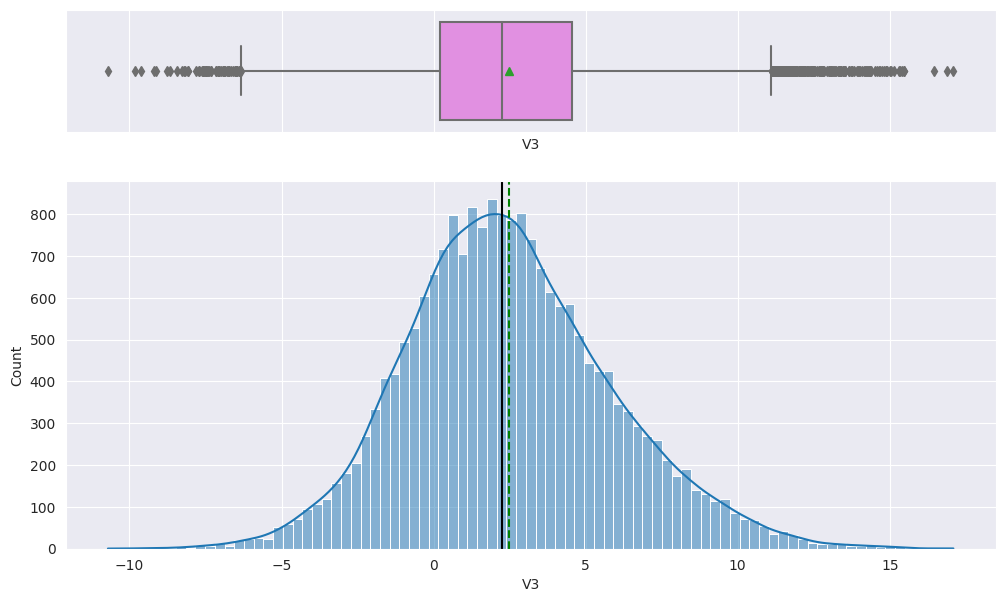

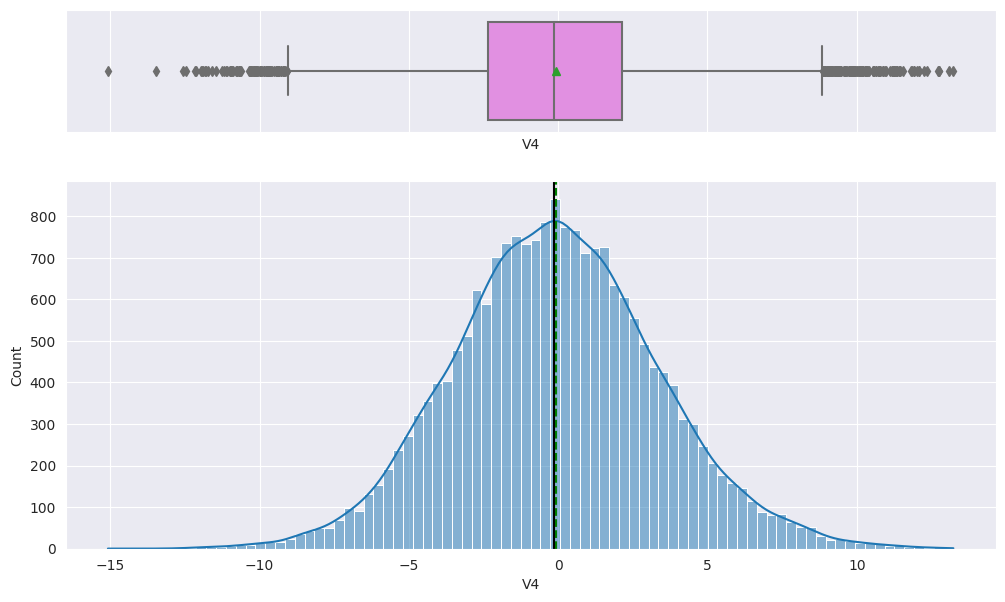

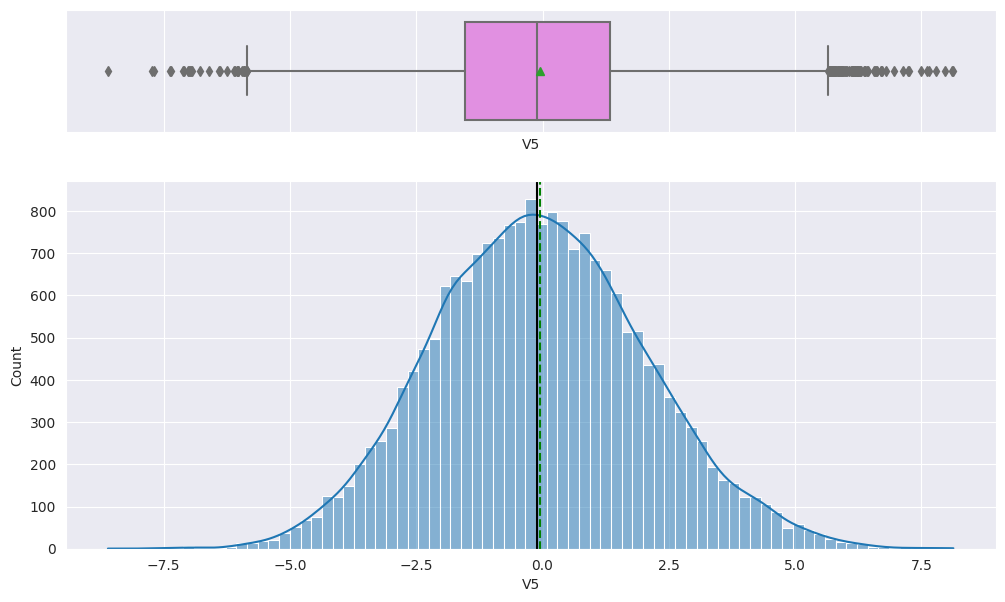

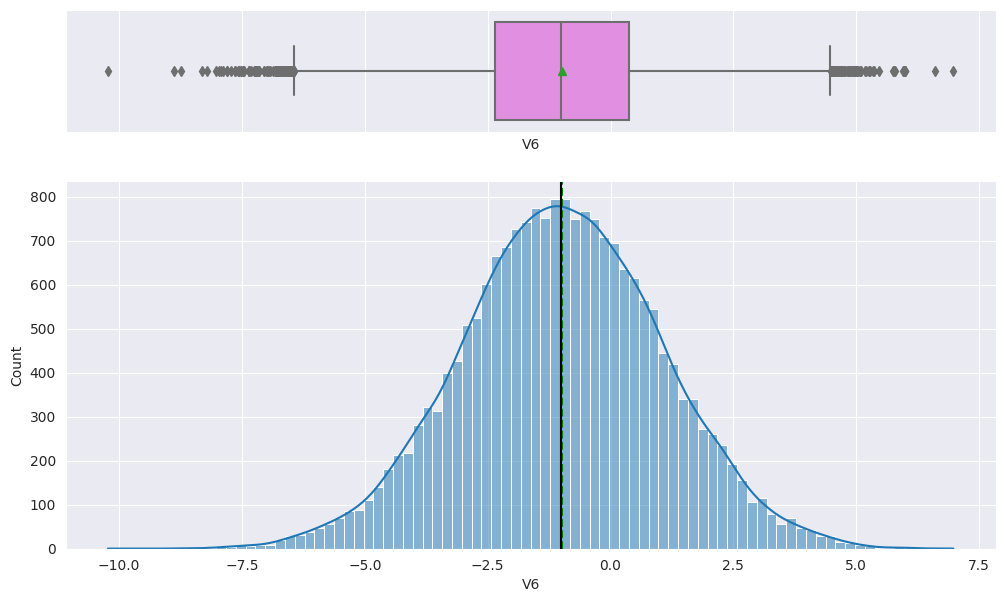

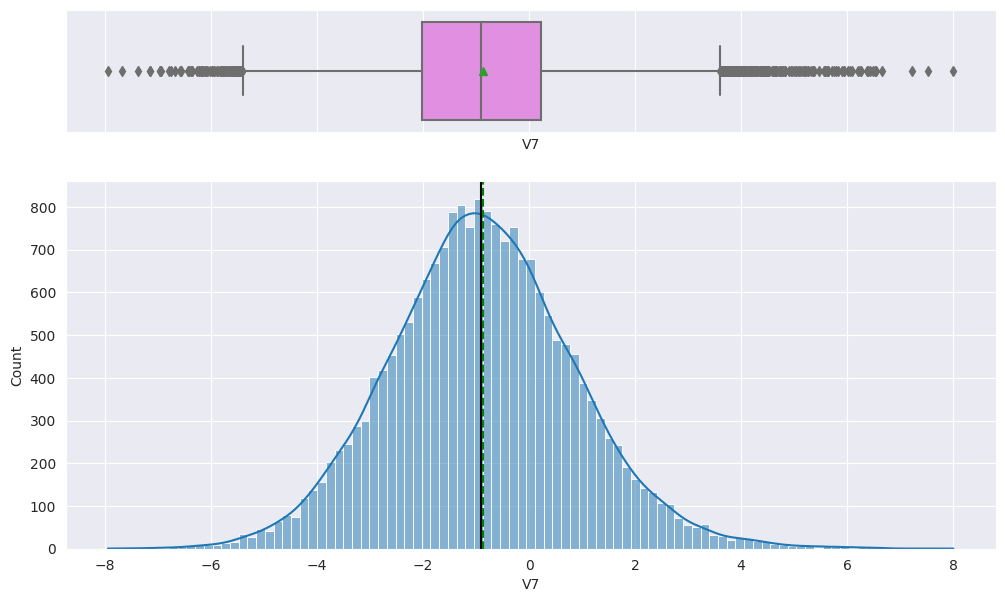

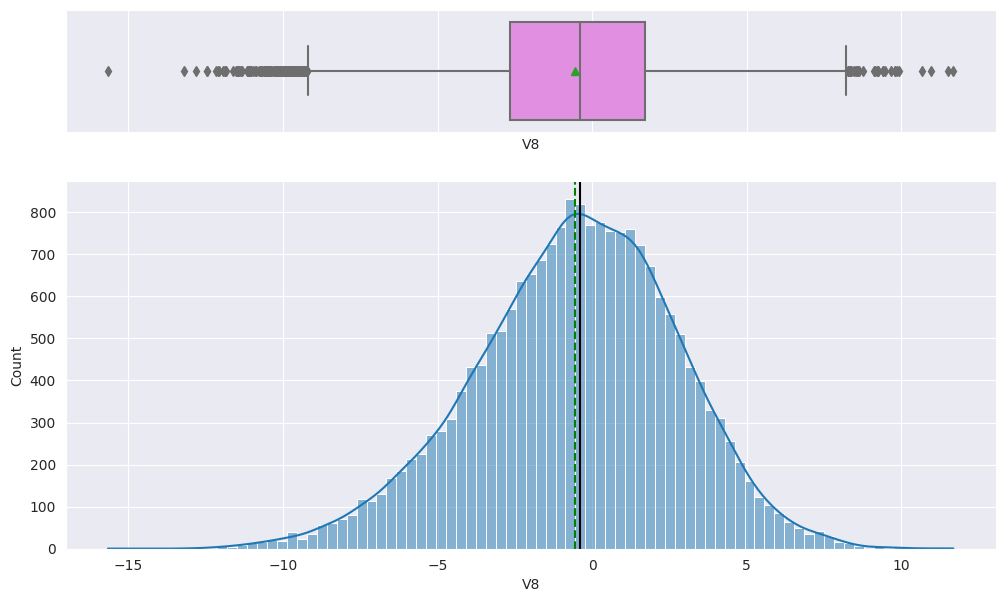

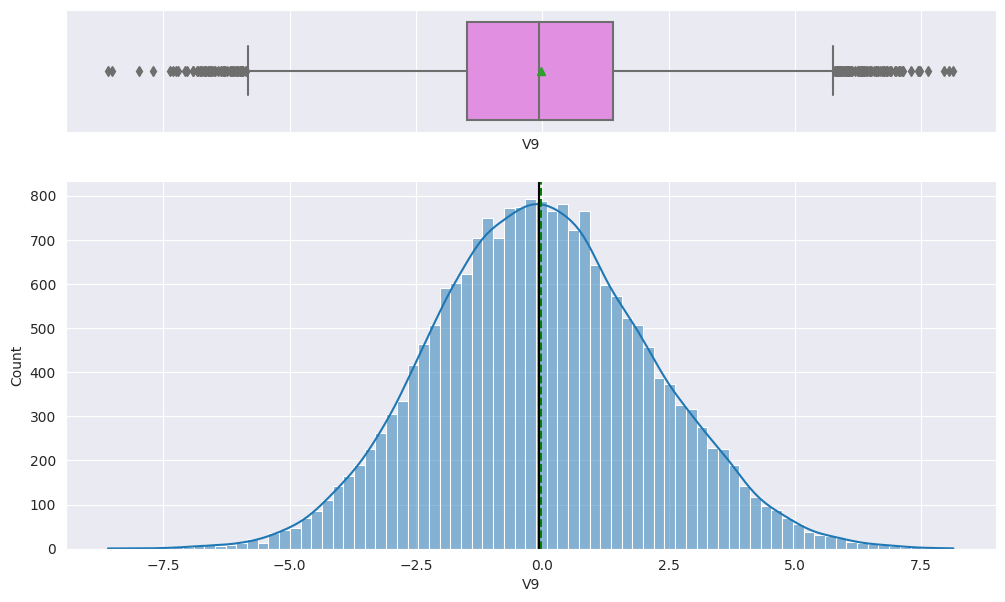

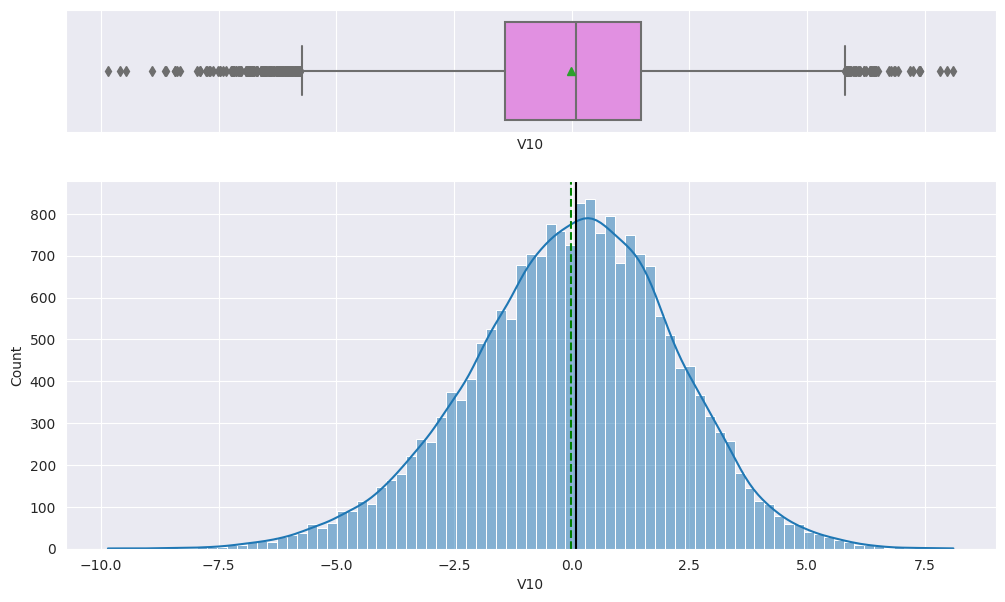

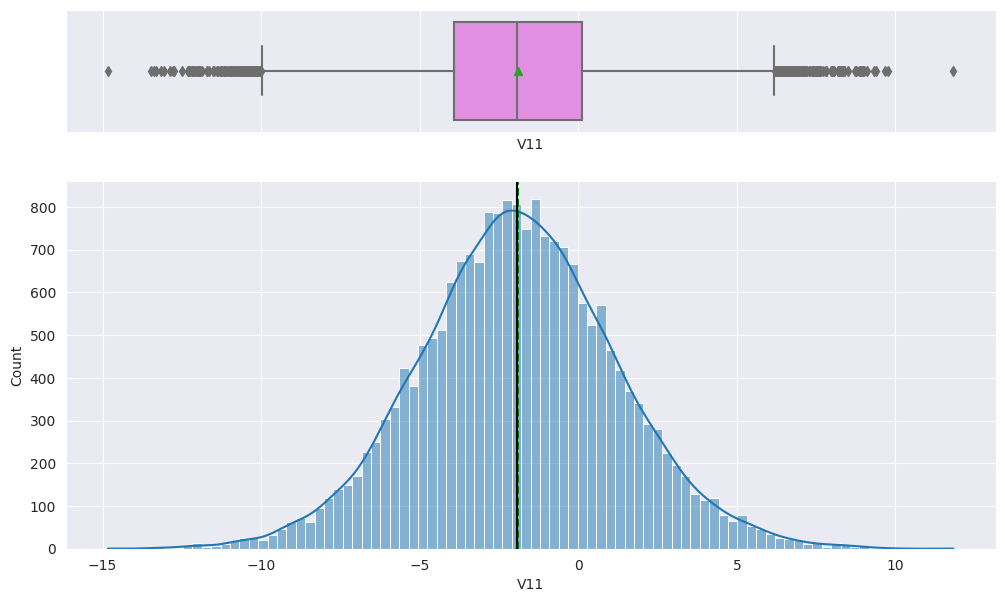

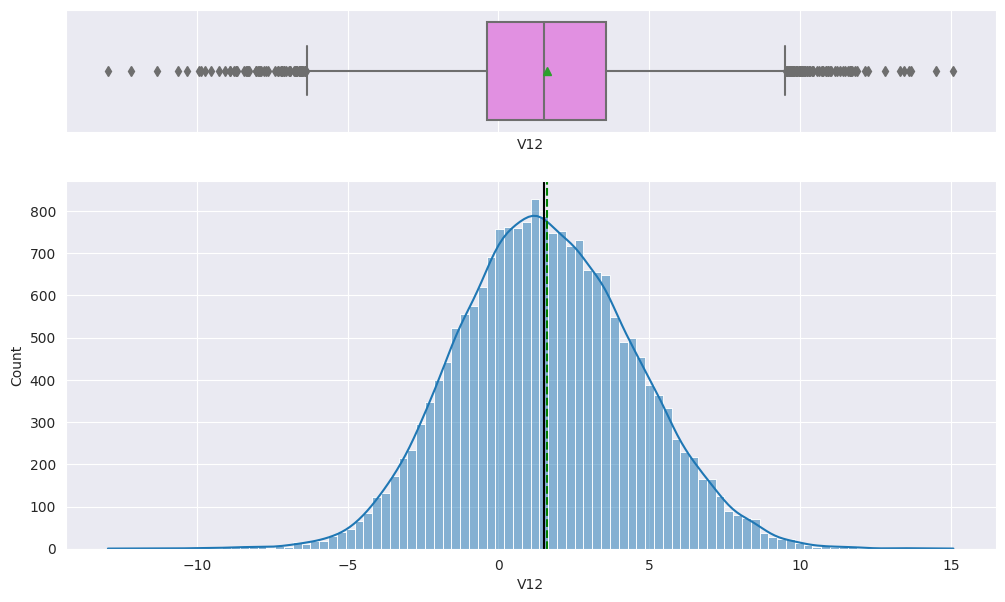

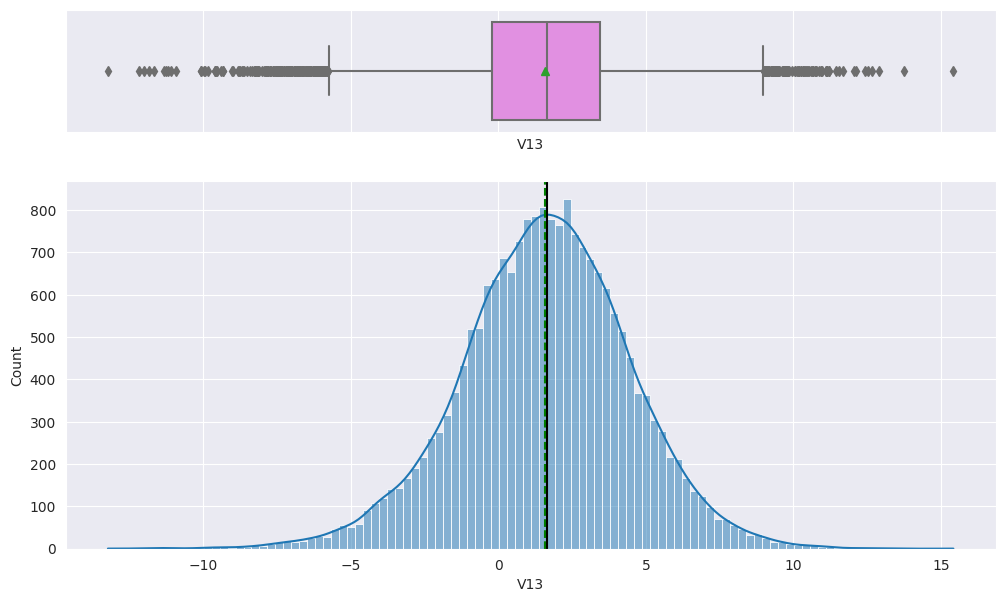

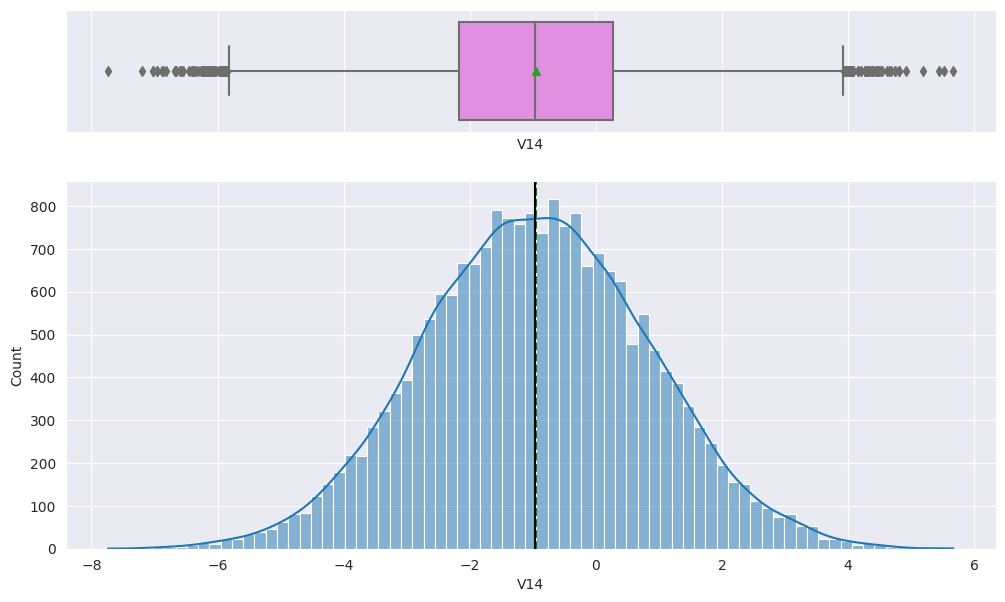

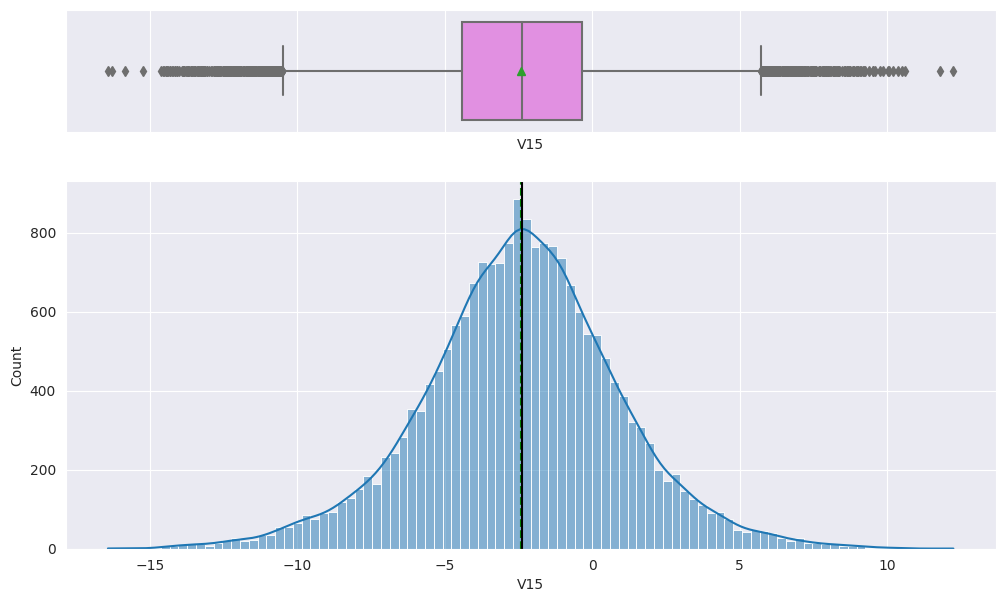

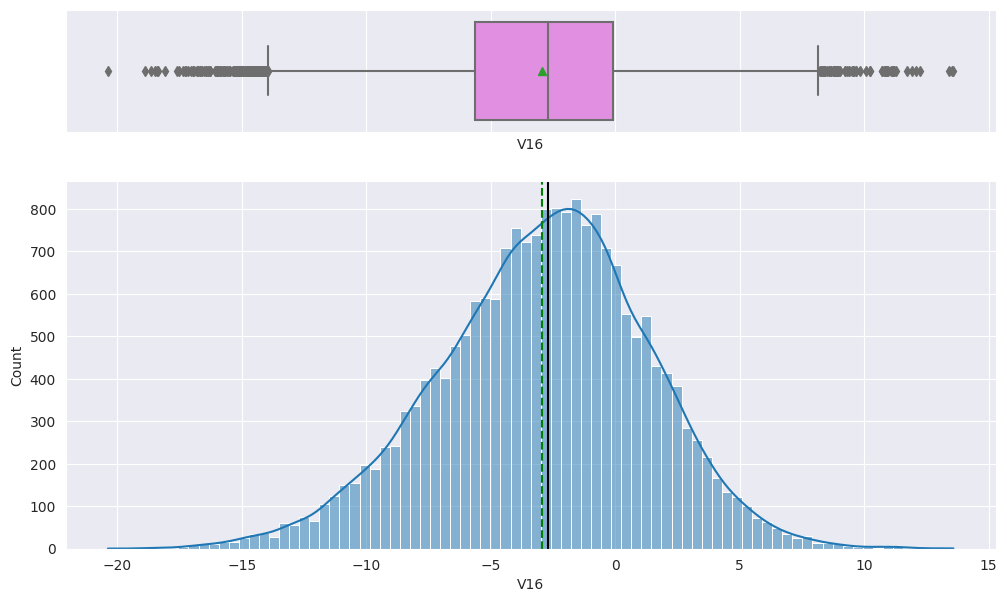

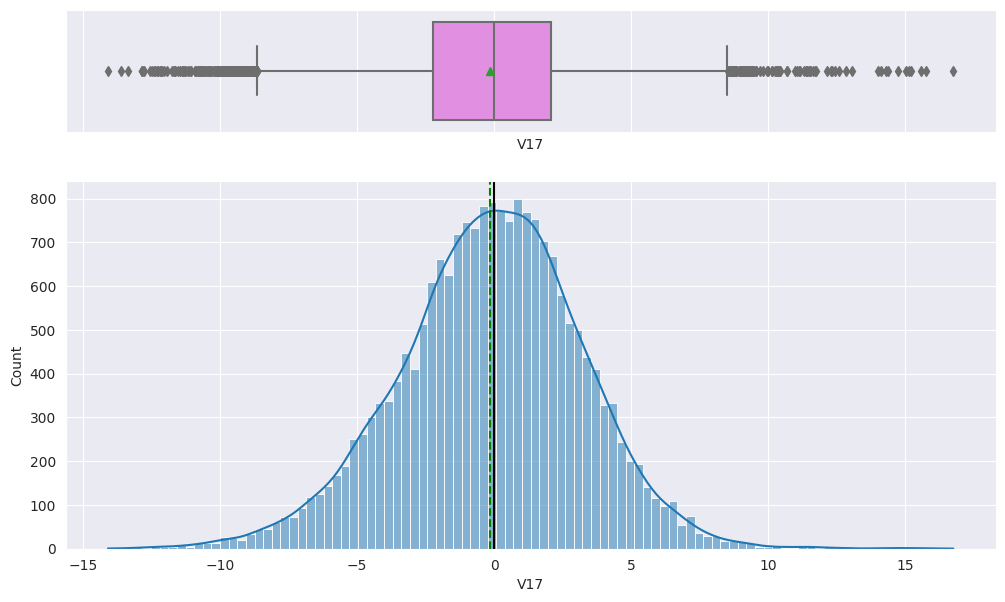

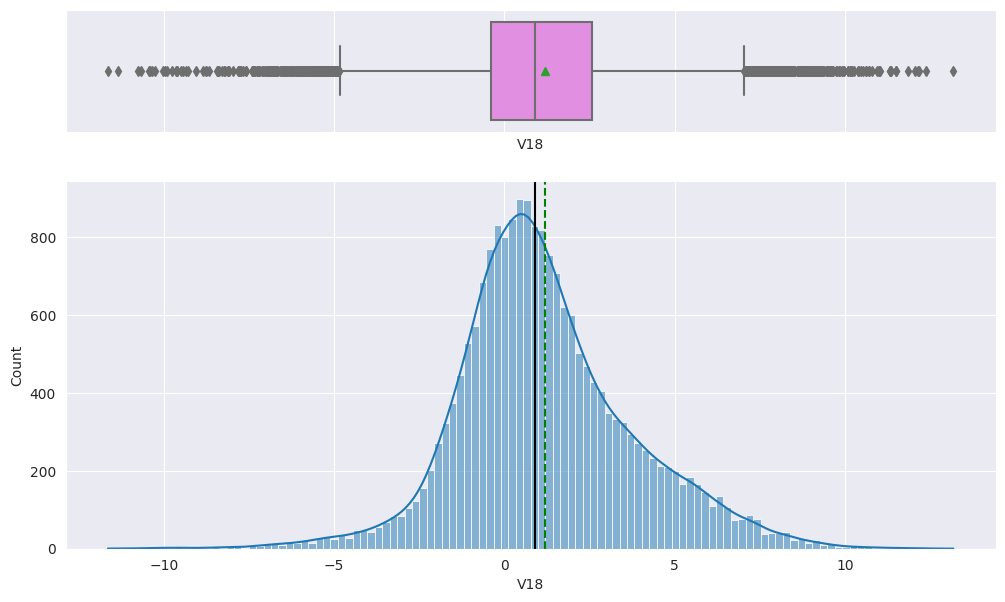

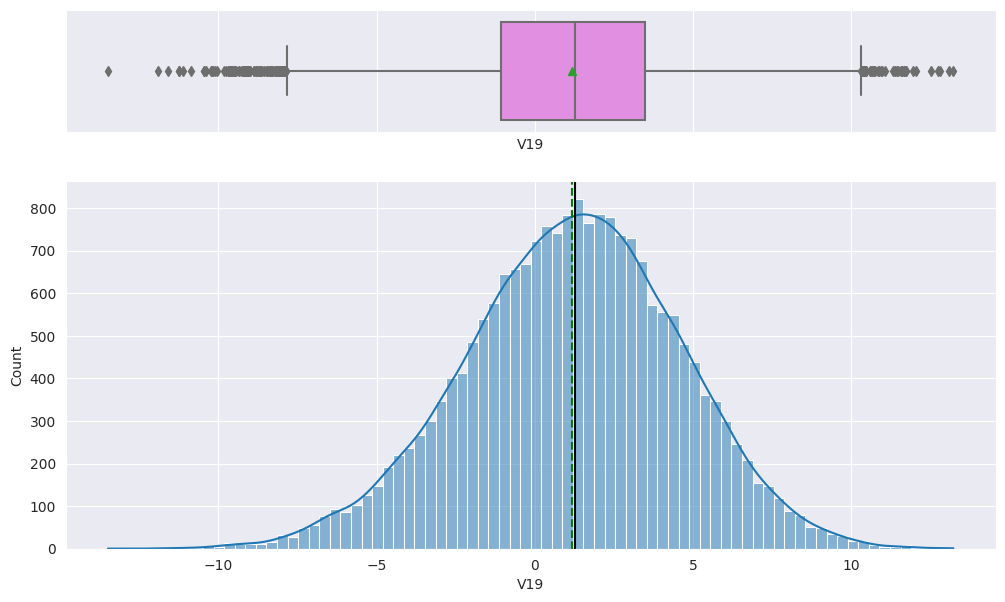

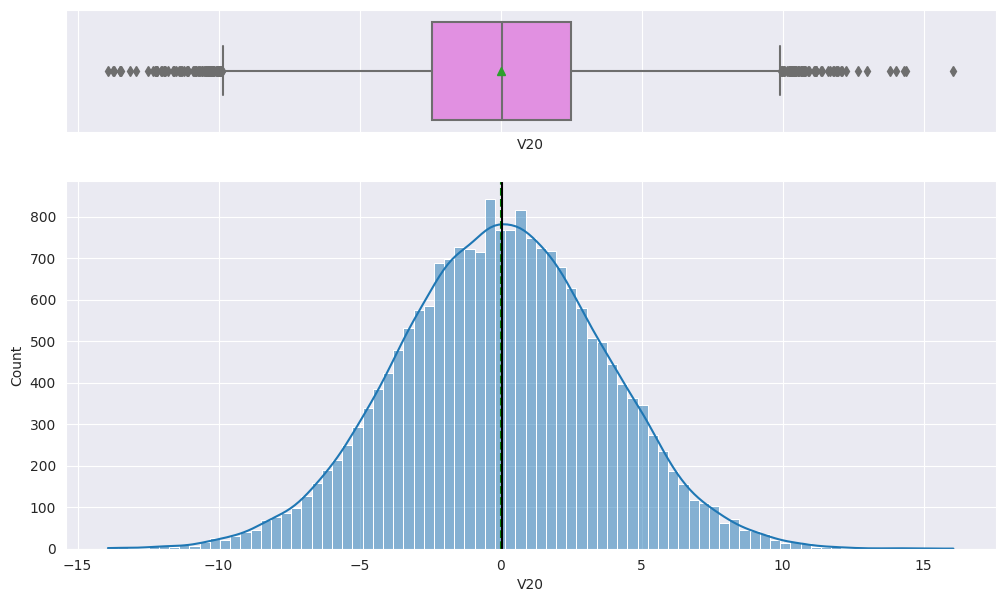

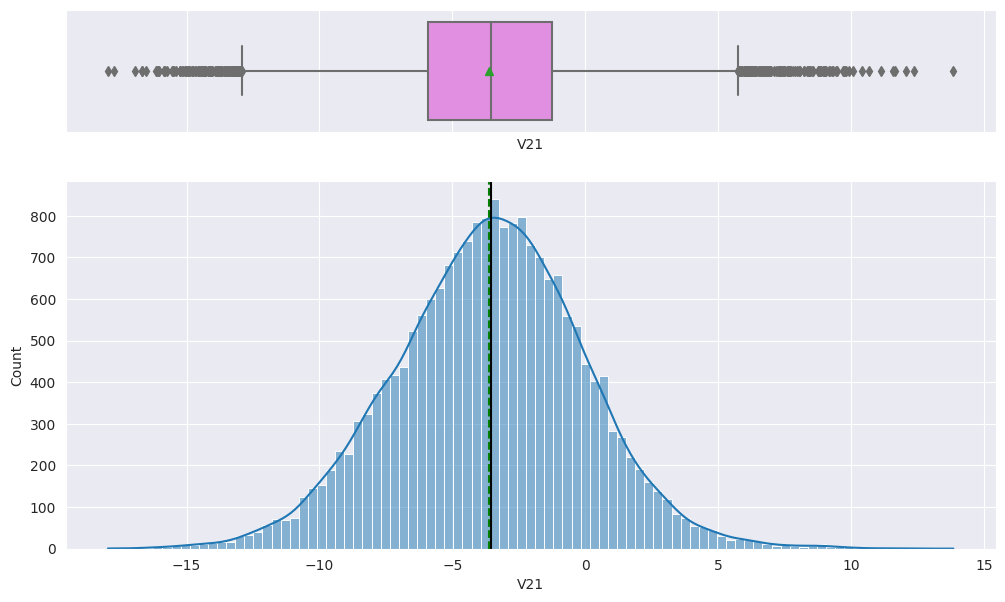

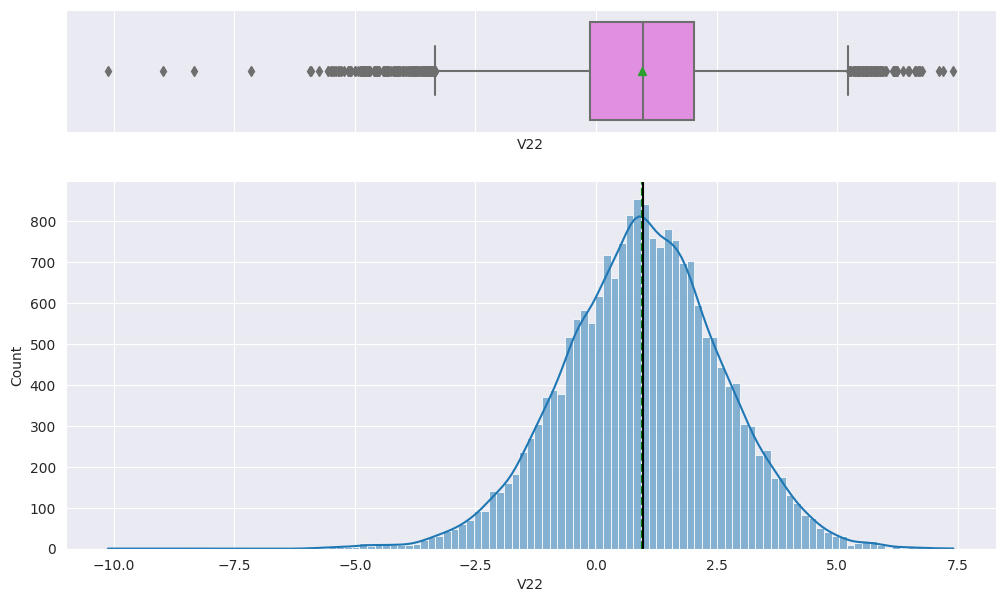

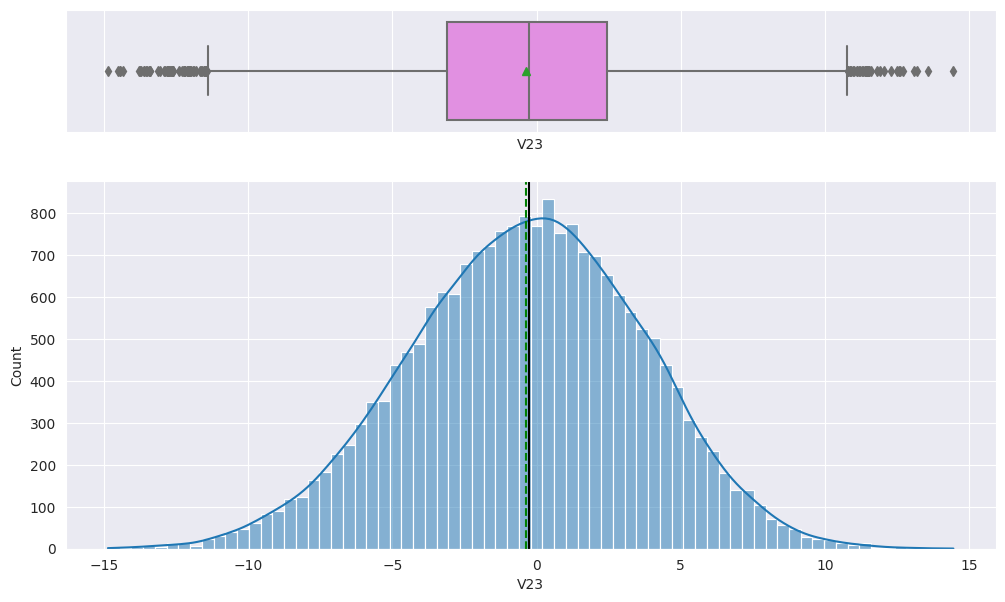

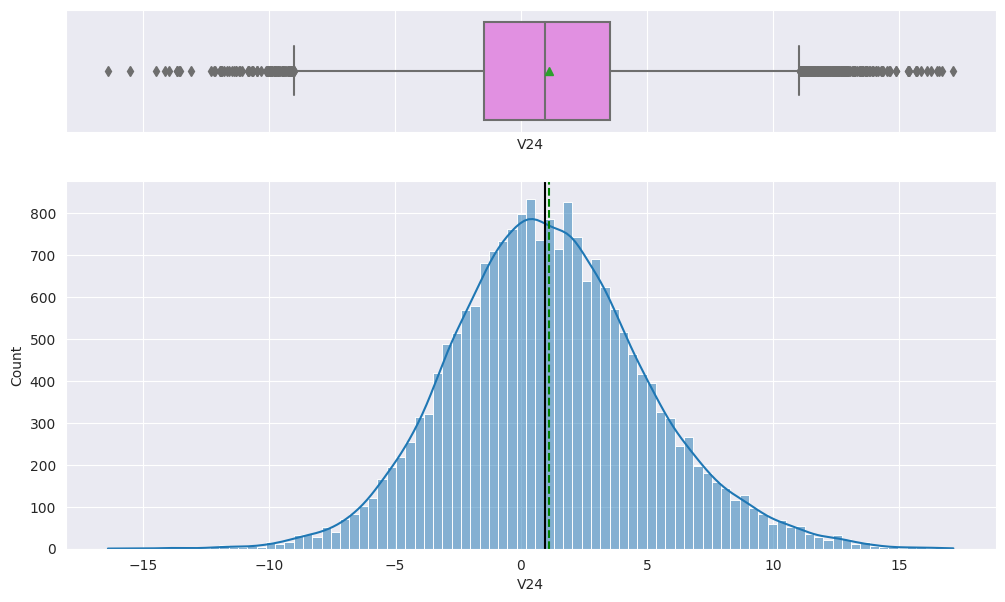

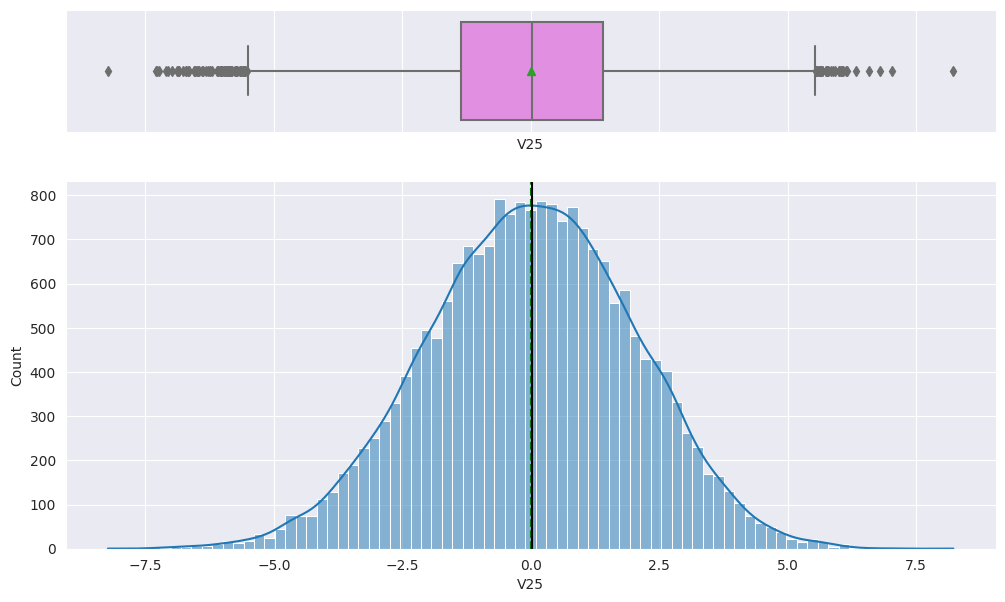

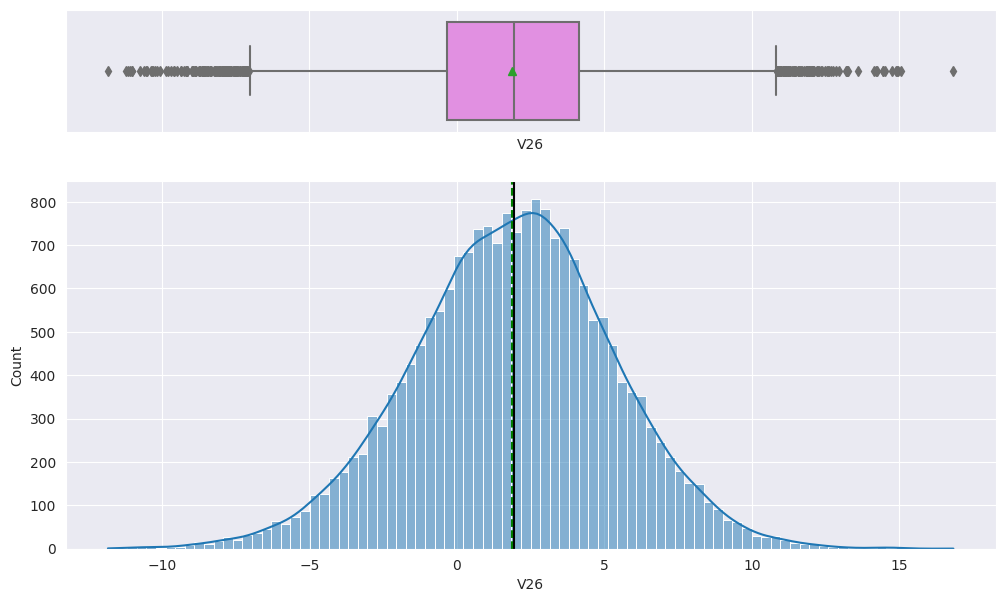

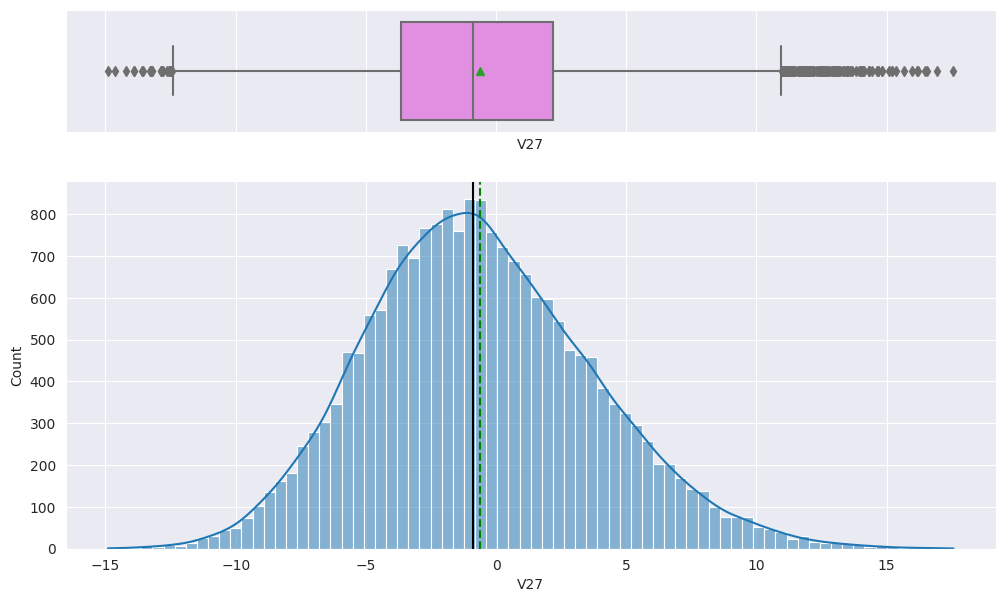

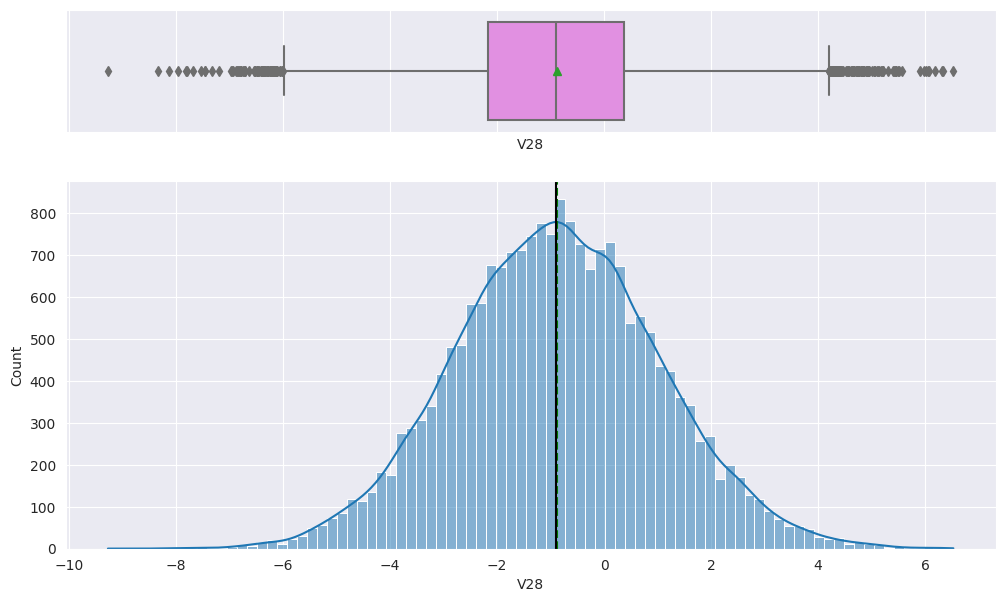

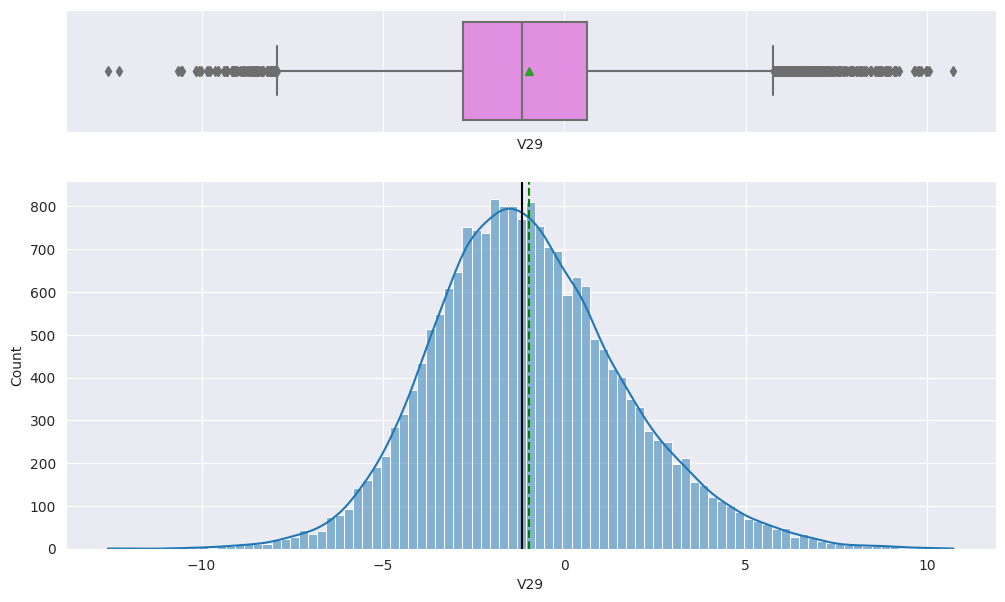

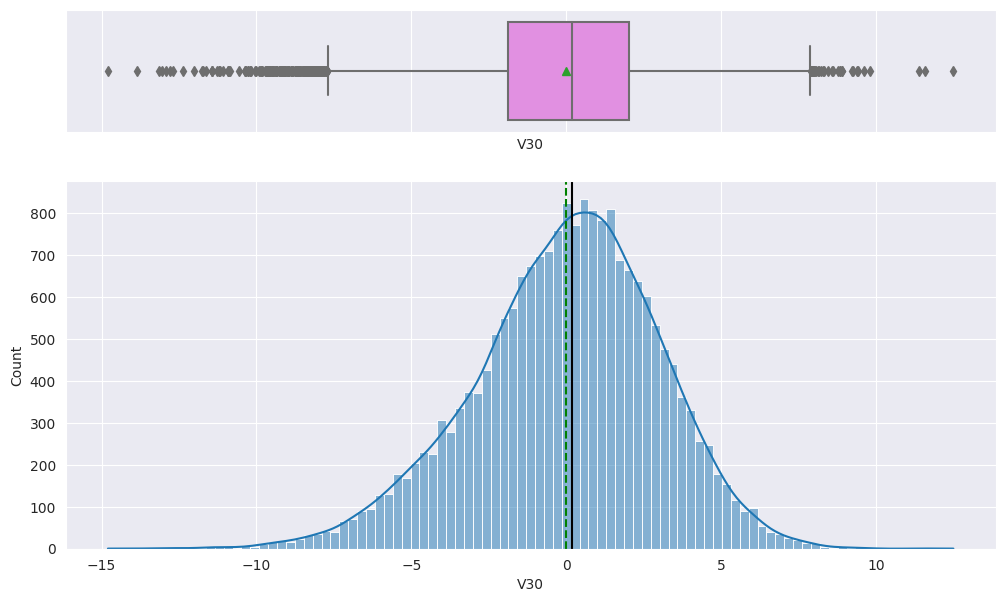

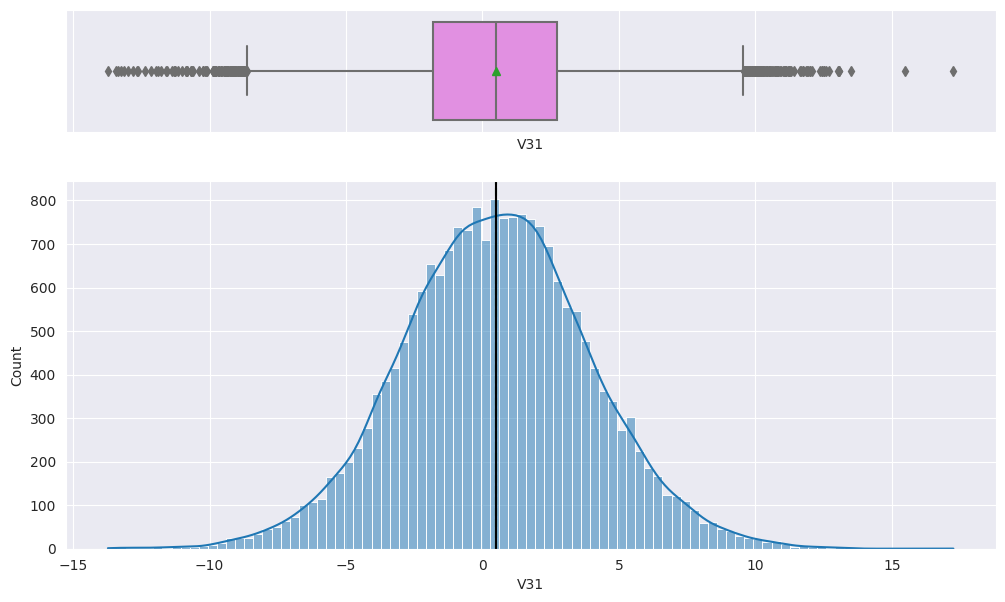

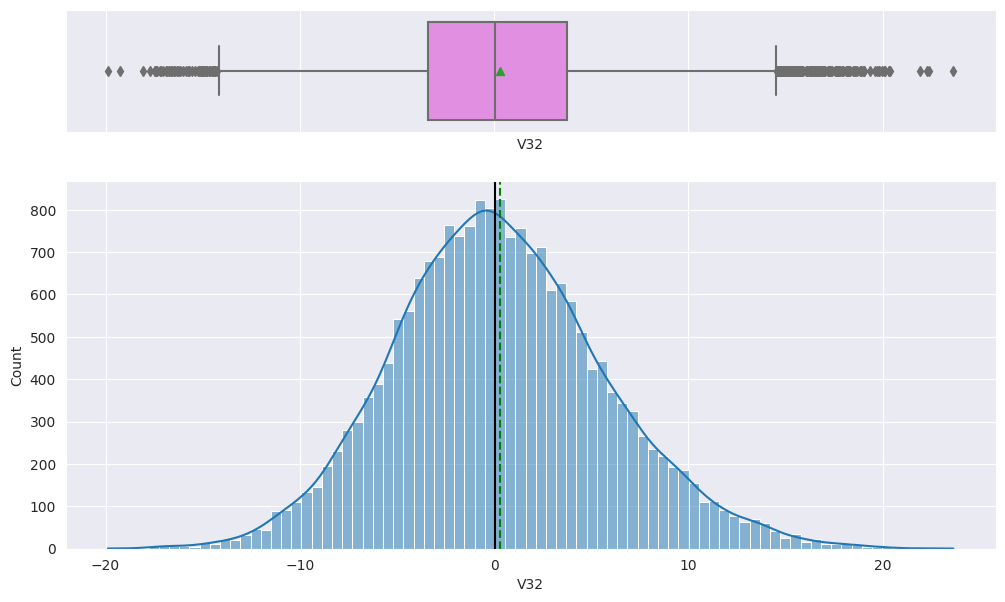

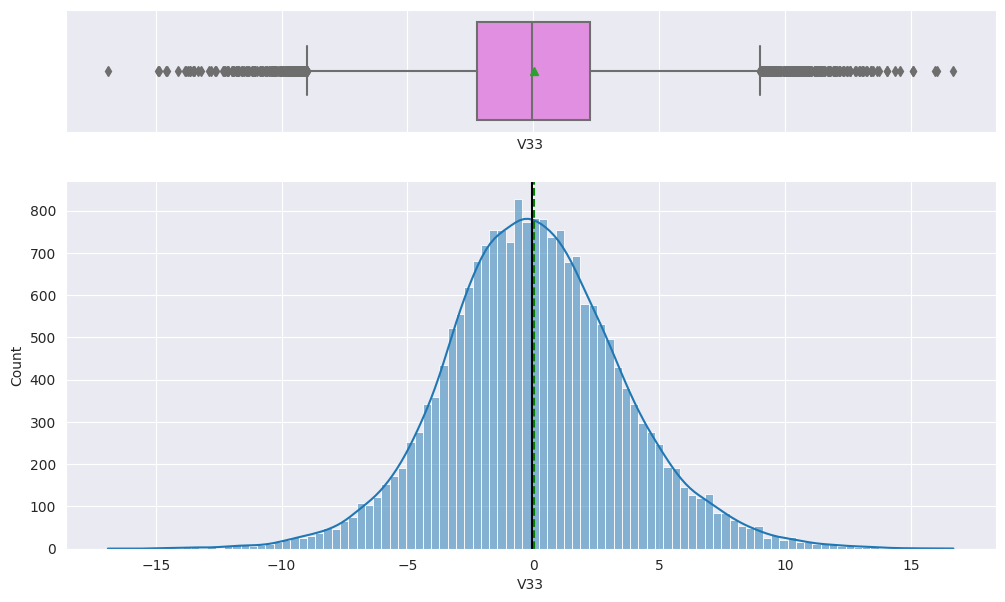

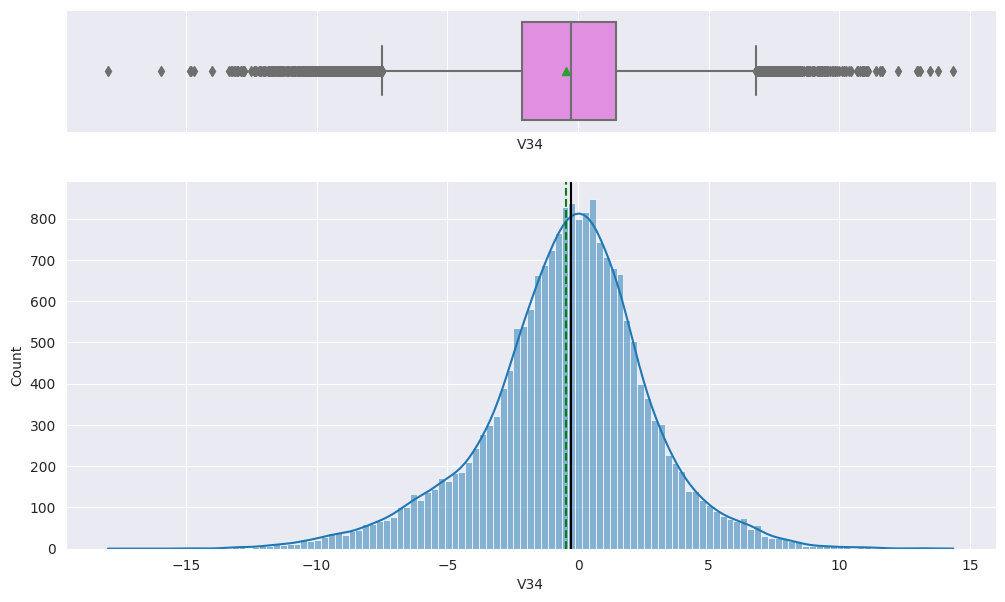

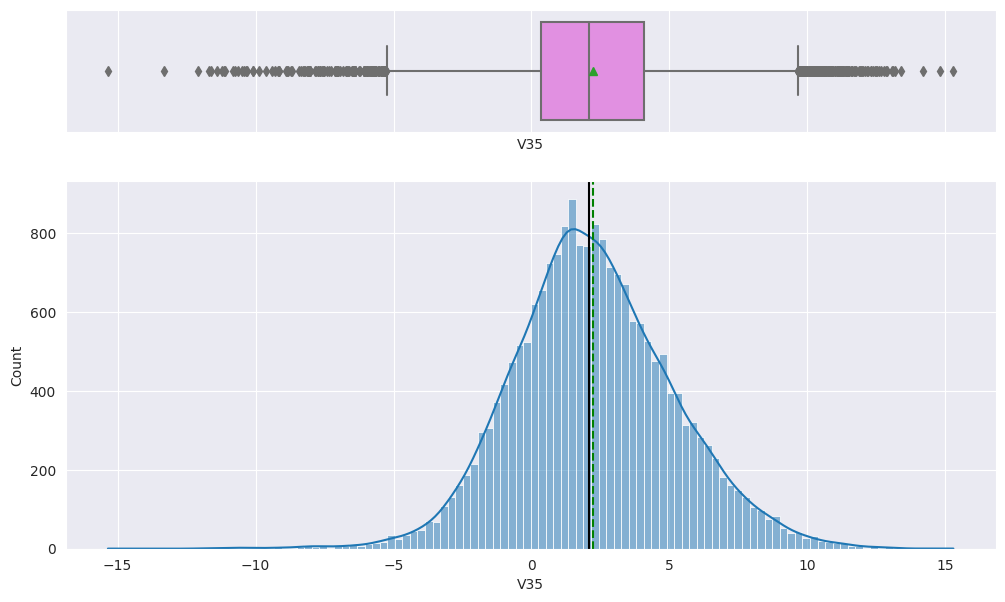

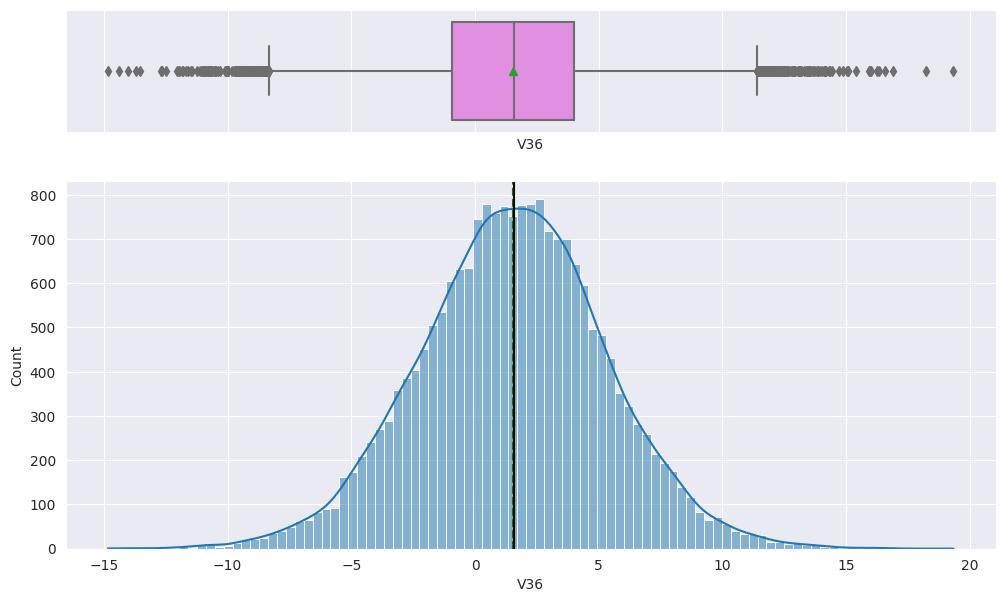

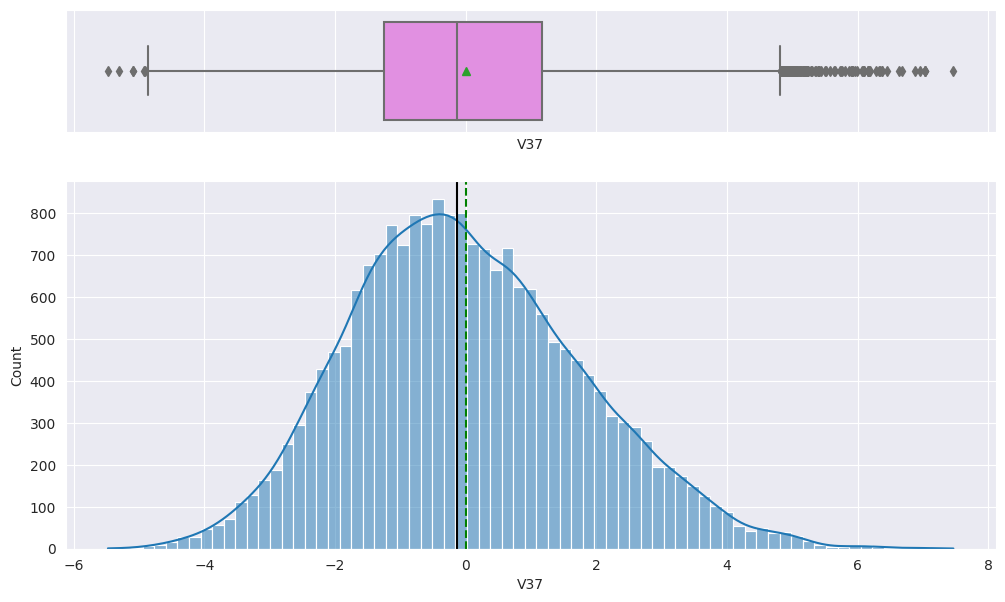

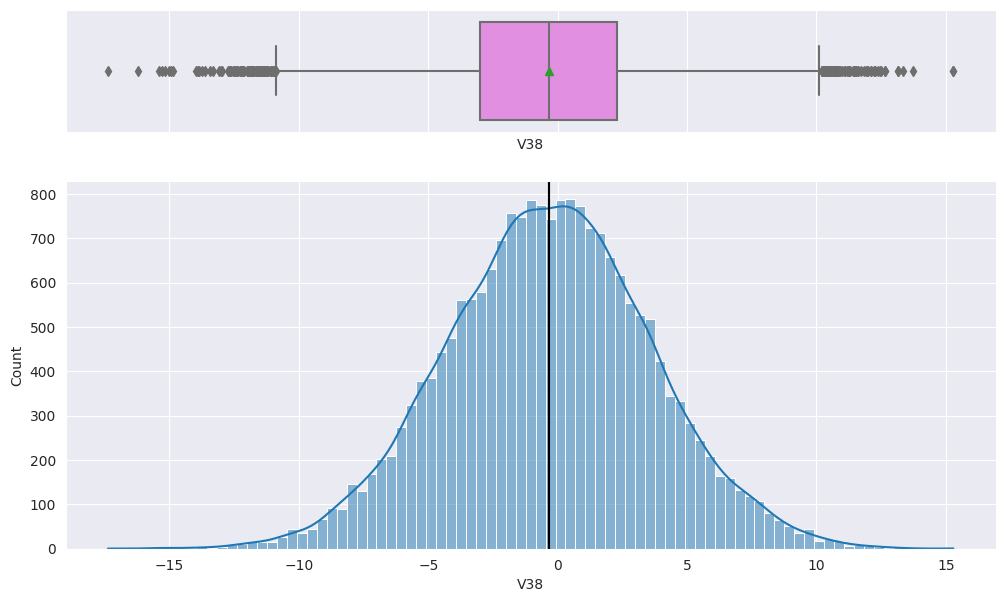

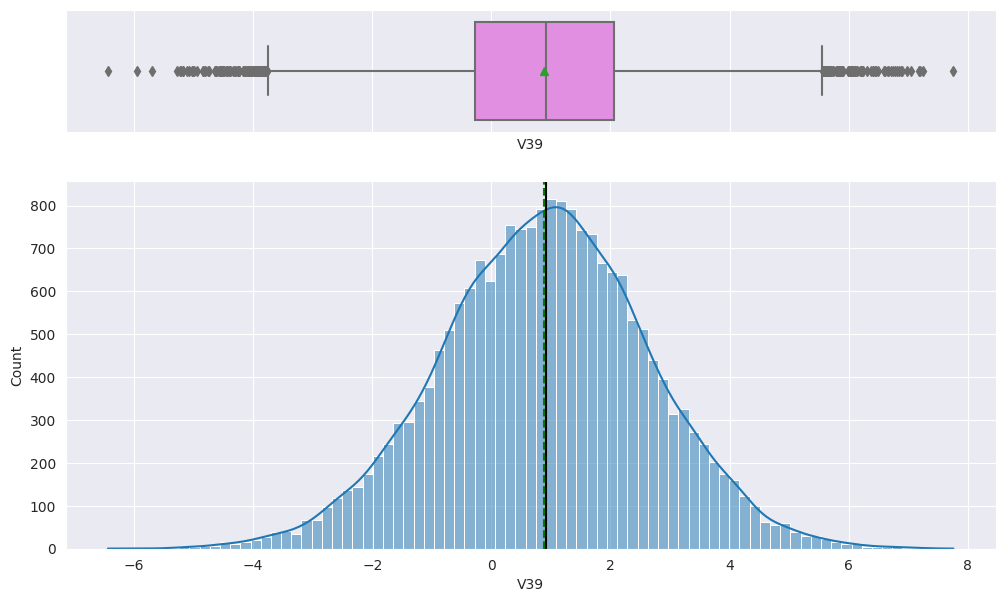

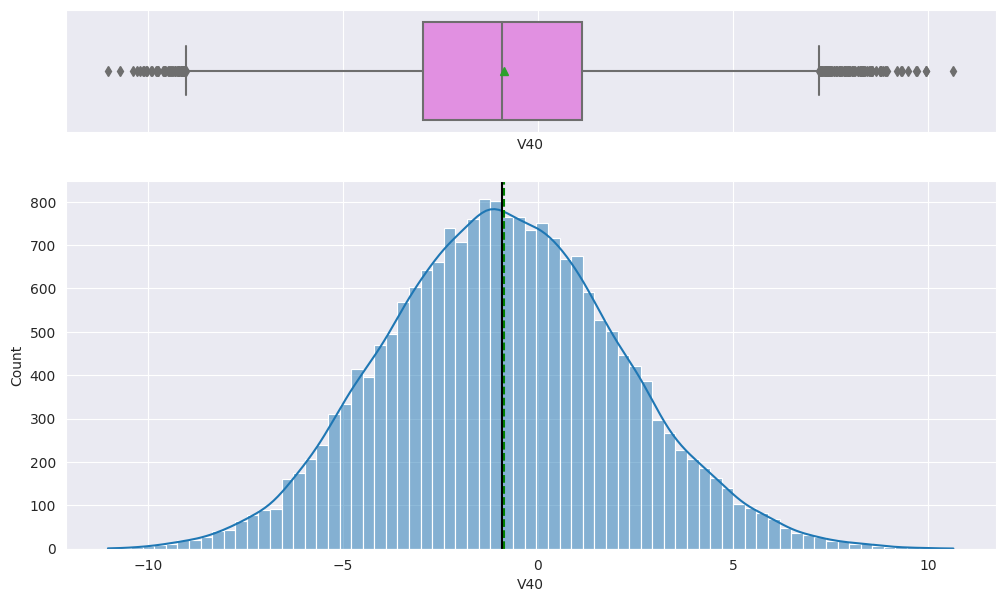

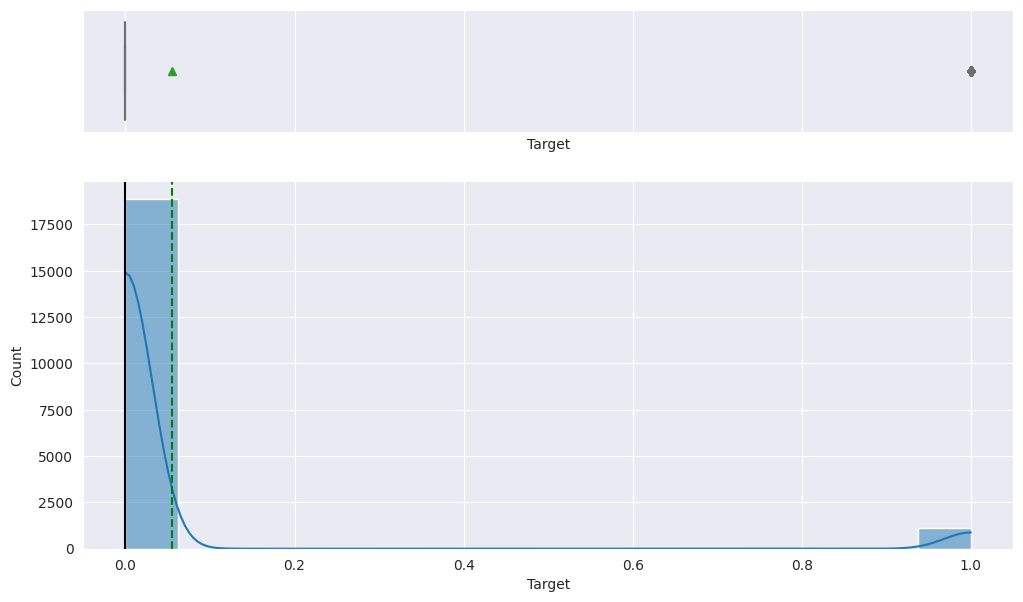

In [ ]:
for feature in data.columns:
    histogram_boxplot(
        data, feature, figsize=(12, 7), kde=True, bins=None
    )  

**Summary Observations**
- As all column names are unknown, not much can be inferred from the Univariate Analysis
- However, it can be noted that
    - All boxplots have outliers at the lower and upper whiskers of the IQR. We will not be treating these outlers as the data is ciphred.
    - For some variables, such as V11, V21, and Target, the mean and median values are slightly different. This indicates some degree of skewness in the distributions of these variables. Specifically, for V11 and V21, the mean is smaller than the median, suggesting negative skewness, while for the Target variable, the mean is slightly larger than the median, indicating positive skewness.


### Observations on target variable : Target

In [ ]:
# “1” in the target variables is “failure” and “0” represents “No failure”.
data["Target"].value_counts(1)

0   0.9445
1   0.0555
Name: Target, dtype: float64

**Observations**
- The distribution of the "Target" variable is imbalanced, with a significantly higher number of "no failure" instances compared to "failure" instances.
- Percentage of "no failure" instances (0) = 94.45%
- Percentage of "failure" instances (1) = 5.55%

In [ ]:
# “1” in the target variables is “failure” and “0” represents “No failure”.
data_test["Target"].value_counts()

0    4718
1     282
Name: Target, dtype: int64

**Observations on Test Data**
- Percentage of "no failure" instances (0) = 94.36% ((4718 / 5000) * 100)
- Percentage of "failure" instances (1): = 5.64%
- Failures in the testing data is also somewhat close to the train data

## Multivariate Analysis

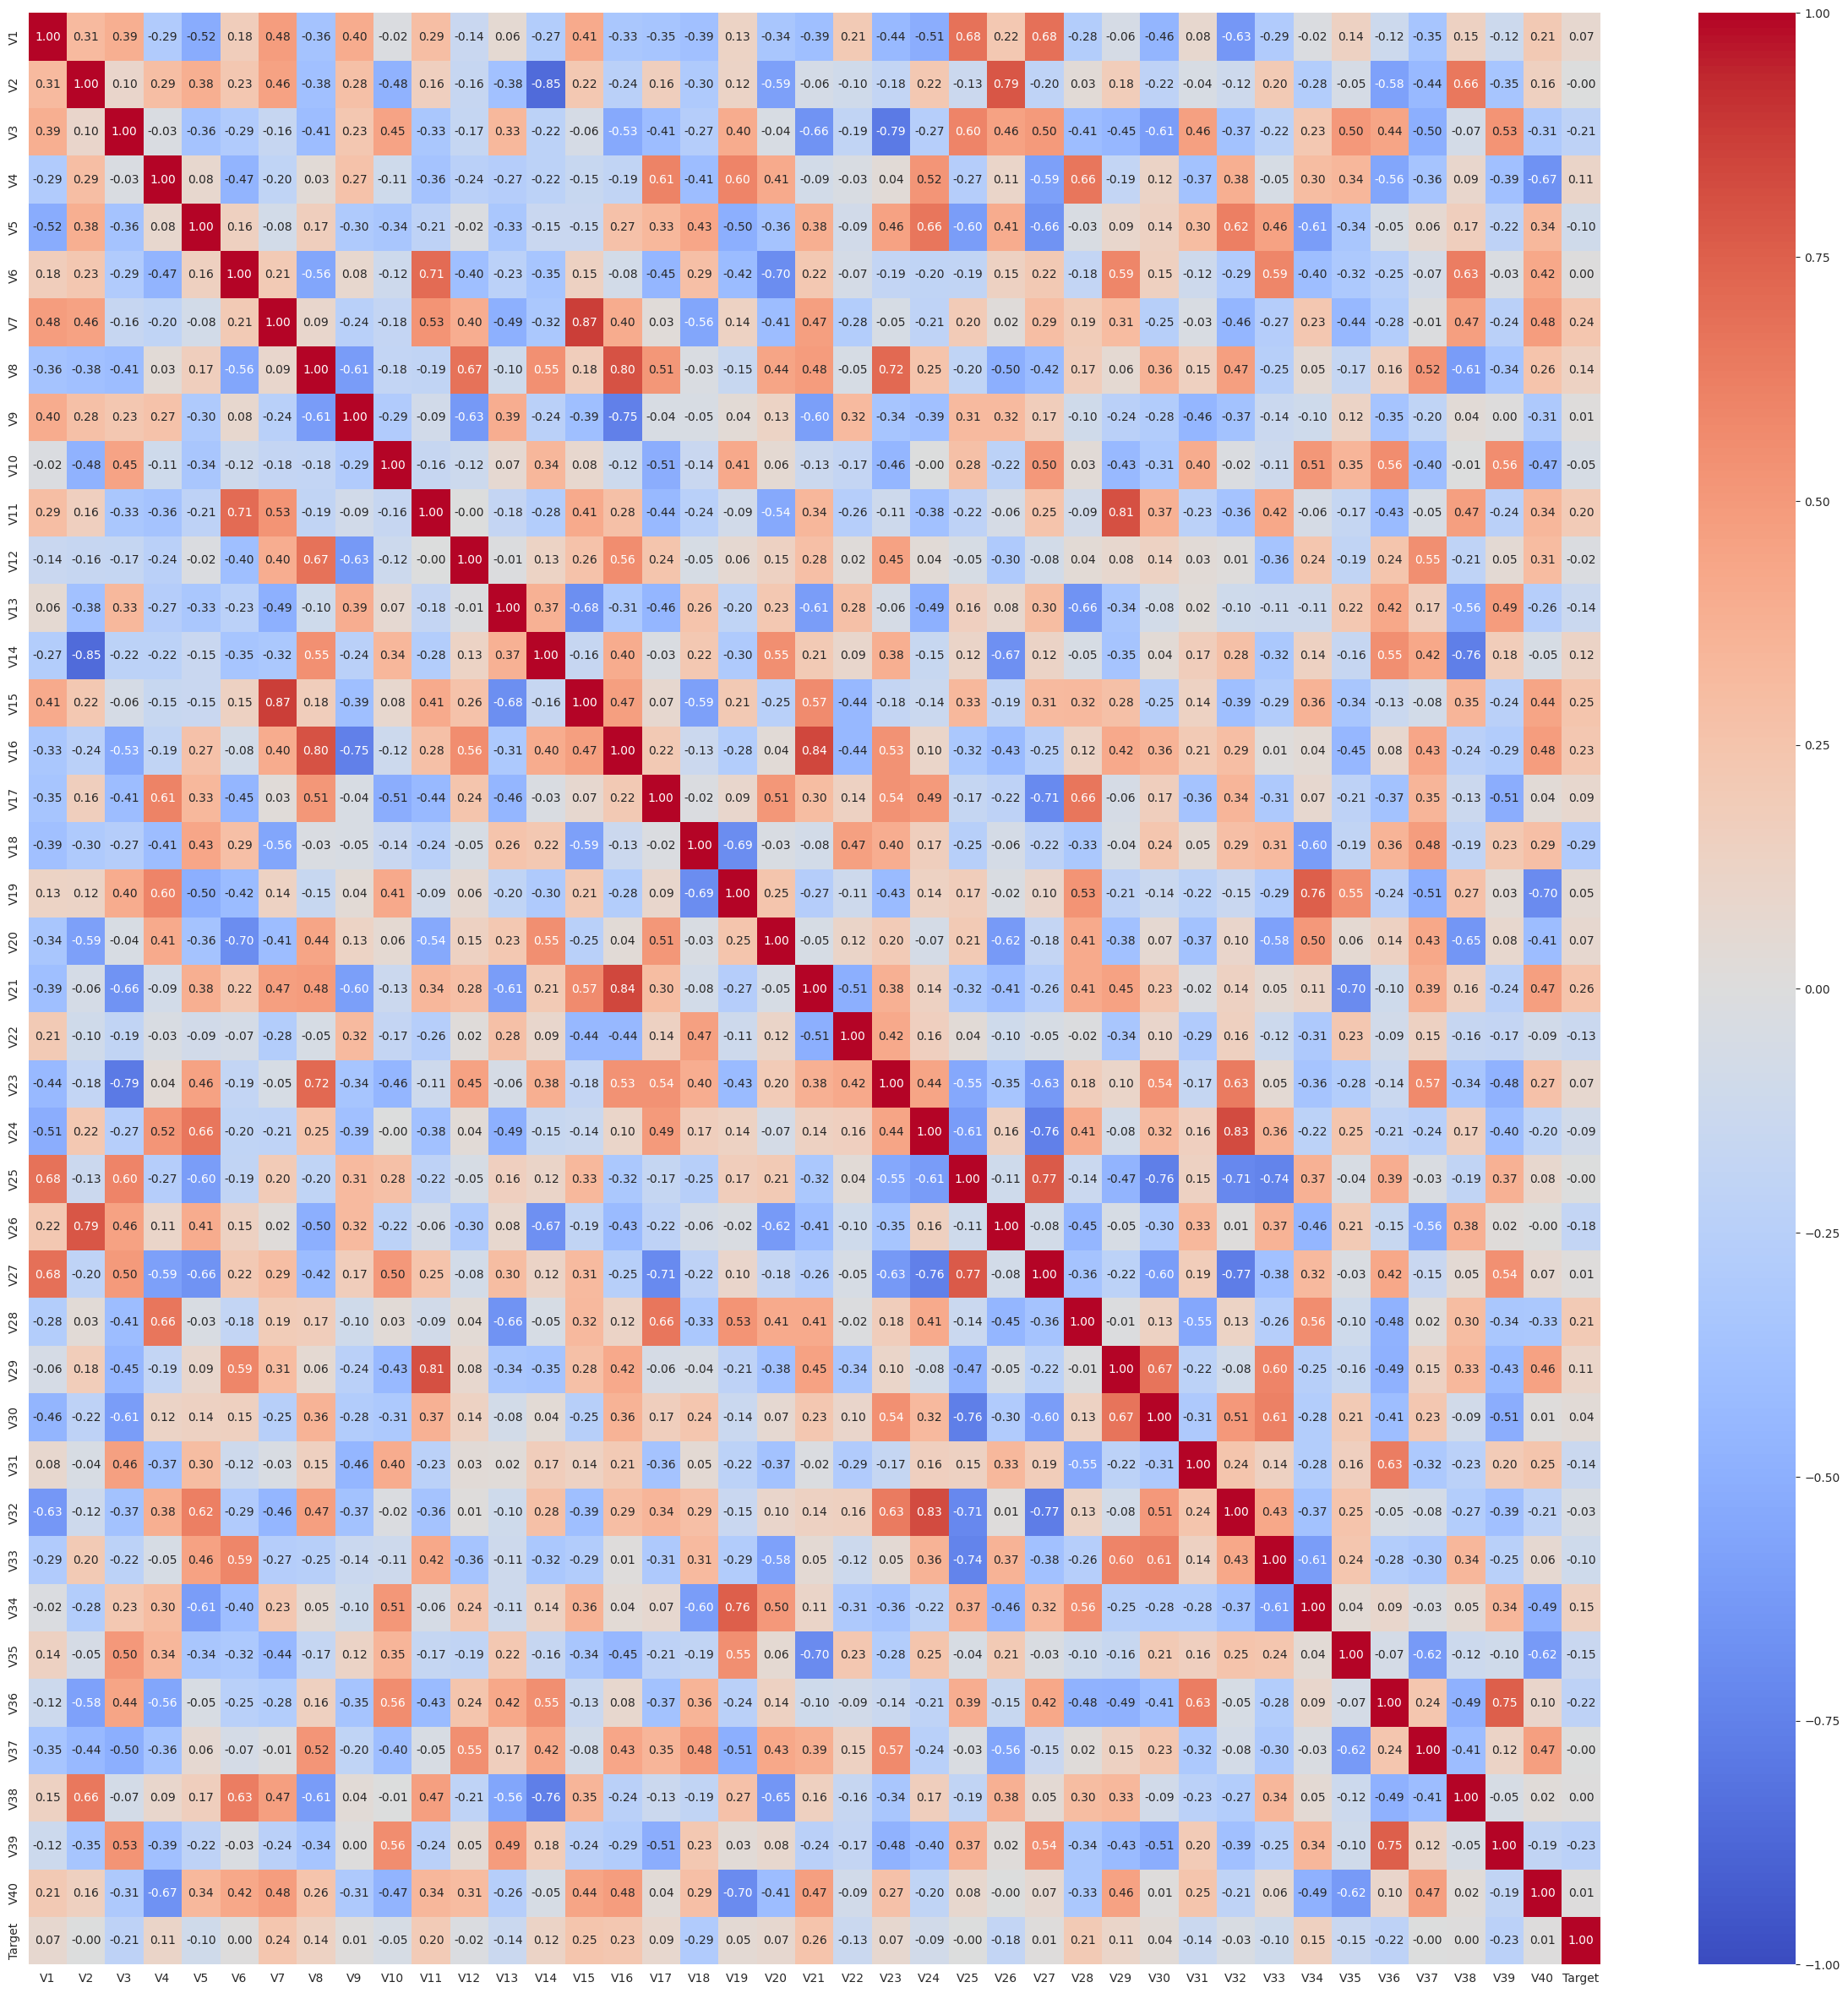

In [ ]:
# lets carry out a correlation heat map to observe target variable
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 30))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

Looking at the Target variable correlation, we can observe positive strong correlation with sensor variables: V15, V7, V16, V21, V28

## Data Pre-processing

* To prevent data leakage, it is generally recommended to carry out the data split into training and validation sets before performing any imputation or preprocessing steps*

- Split should be performed on the Train.csv dataset to create separate training and validation sets. The Test.csv dataset should be kept as a standalone dataset for final evaluation after model development.

In [ ]:
# Separating target variable and other variables into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]


In [ ]:
# Splitting data into training and validation set:
# test_size parameter specifies the proportion of data to be allocated for validation (in this case, 20% of the data)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Checking the number of rows and columns in the X_train data
# Checking the number of rows and columns in the X_val data

print(X_train.shape, X_val.shape)

(16000, 40) (4000, 40)


**Observations**
- Following the 80:20 split ratio of the training and validation sets:
    - Training set: 16000 observations 
    - Validation set: 4000 observations


In [ ]:
# Dividing test data into X_test and y_test
# drop target variable from test data
# store target variable in y_test
# note, we do not needto split the test data as the dataset should be kept as a standalone dataset for final model

X_test = data_test.drop(["Target"], axis = 1)
y_test = data_test["Target"] 

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing value imputation

In [ ]:
'''
Rather than using a single SimpleImputer instance with the strategy set to "median",
I will uses a separate SimpleImputer instance for each column with missing values that needs imputation
with the median

In terms of handling missing values in the Train and Test datasets, it is generally recommended to use
separate Imputer

Refer to Appendix Student Notes : Imputer
'''
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["V1", "V2"]

In [ ]:
# fit and transform imputer on train data
X_train[cols_to_impute] = imp_median.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_median.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_median.transform(X_test[cols_to_impute])

In [ ]:
# Validate that no columns have missing values in train or test sets
print('Count of missing values in train set')
print(X_train.isna().sum())
print("-" * 30)
print()
print('Count of missing values in validation set')
print(X_val.isna().sum())
print("-" * 30)
print()
print('Count of missing values in test set')
print(X_test.isna().sum())

Count of missing values in train set
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Count of missing values in validation set
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Count of missing values in test set
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9 

**Observations**
- There are no further missing values found in the training, validation, or test sets.

## Model Building / Evaluation

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want <font color="blue">`Recall to be maximized`</font> as greater the Recall, the higher the chances of minimizing false negatives.
* We want to <font color="blue">`minimize false negatives`</font> because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building with original data (train)

In [ ]:
%%time 
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.48988129245223133
Bagging: 0.7083222243382213
Decision Tree: 0.7196280073636767
Random Forest: 0.7195899193804354
Gradient Boosting: 0.7173363803719928
XGBoost: 0.810804291246112

Validation Performance:

Logistic Regression: 0.49099099099099097
Bagging: 0.7207207207207207
Decision Tree: 0.7387387387387387
Random Forest: 0.7432432432432432
Gradient Boosting: 0.7432432432432432
XGBoost: 0.8153153153153153
CPU times: user 6min 2s, sys: 999 ms, total: 6min 3s
Wall time: 5min 29s


**Based on the provided cross-validation and validation performance scores, we can analyze the performance of different models on the training dataset and the validation dataset.** 

1. Logistic Regression performed consistently with similar scores on both the training dataset and the validation dataset. This indicates that these models are likely not overfitting and it has generalized reasonably well. 
2. Logistic Regression consistently achieved the lowest performance among all the models. Its performance is relatively weaker compared to the ensemble-based models (Bagging, Random Forest, and Gradient Boosting) and the tree-based models (Decision Tree and XGBoost).
3. Bagging, Random Forest, and Gradient Boosting also performed well, with similar scores. They exhibited slightly higher performance than the Decision Tree model and significantly higher performance than the Logistic Regression model. 
4. XGBoost demonstrated the best performance amongst the models, both on the training dataset and the validation dataset. It outperformed all other models, including the ensemble methods. This indicates that it has generalized well and is able to make accurate predictions on unseen data.

<font color = 'blue'> *Based on these results, XGBoost seems to be the most effective model for this task, as it achieves the highest performance on both the cross-validation and validation datasets.* </font>

Student Note :  If a model performs significantly better on the training dataset than on the validation dataset, it suggests overfitting

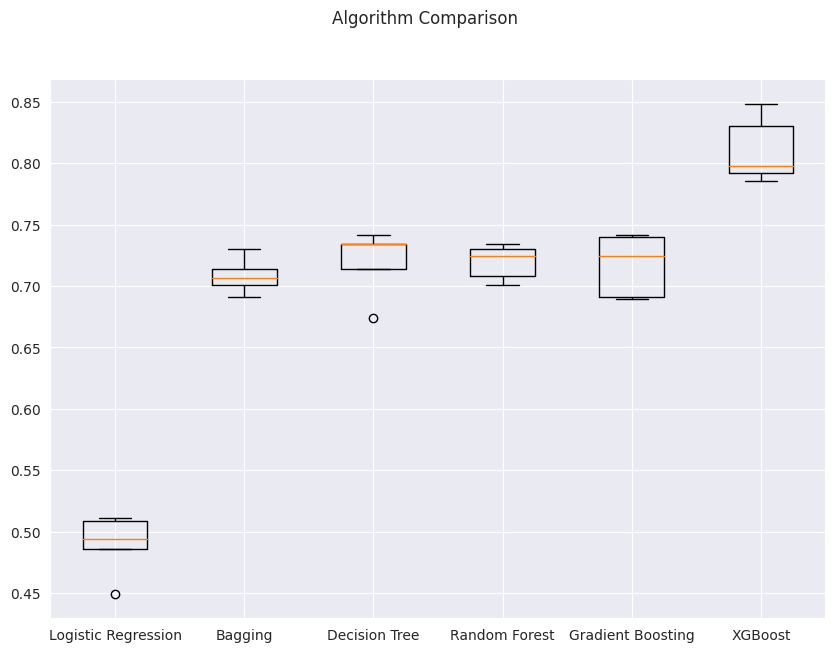

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**
1. The median of each box represents the middle value of the cross-validation scores. Models with higher medians indicate better average performance on the training dataset.
2. Based on the boxplot, we can observe that XGBoost has the highest median score (approx 0.799) among all the models, indicating the best average performance on the training dataset.
3. Random Forest and Gradient Boosting have relatively similar median scores, suggesting comparable performance.
4. Logistic Regression has the lowest median score, indicating relatively lower average performance compared to the other models.

### Model Building with Oversampled data (Training DAta)


In [ ]:
# check the count of target variable before oversampling
# count the instances with label '1' and '0'

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique (SMOTE)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

#Check the count of target variables after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

#give the number of instances (rows) and the number of features (columns) in the oversampled training data
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))

# represents the target variable after applying oversampling
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 888
Before OverSampling, counts of label '0': 15112 

After OverSampling, counts of label '1': 15112
After OverSampling, counts of label '0': 15112 

After OverSampling, the shape of train_X: (30224, 40)
After OverSampling, the shape of train_y: (30224,) 



**Observation**
1. It appears that before oversampling, the training data had an imbalance between the two classes, with the majority class ('0') having a much larger representation in the dataset.(15,112)
2. After applying oversampling technique, the class distribution has been balanced with both classes having 15,112 instances each. 

In [ ]:
%%time 
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset::" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset::

Logistic Regression: 0.8812865538044636
Bagging: 0.9781630048735123
Decision Tree: 0.9732668119313808
Random Forest: 0.9855744607906776
Gradient Boosting: 0.9239674518302545
XGBoost: 0.9906035856141958

Validation Performance:

Logistic Regression: 0.8513513513513513
Bagging: 0.8423423423423423
Decision Tree: 0.8198198198198198
Random Forest: 0.8558558558558559
Gradient Boosting: 0.8828828828828829
XGBoost: 0.8693693693693694
CPU times: user 10min 37s, sys: 1.52 s, total: 10min 38s
Wall time: 9min 9s


Based on the provided cross-validation scores and validation performance for both the original data and the oversampled data model, we can make the following observations:

***Original Data Model:***

- Logistic Regression: The performance of logistic regression is relatively poor, with low cross-validation scores (0.49) and validation performance (0.49). 
- Bagging, Decision Tree, Random Forest, Gradient Boosting, XGBoost : show better performance than logistic regression, with higher cross-validation scores (ranging from 0.71 to 0.81) and validation performance (ranging from 0.72 to 0.82). Among them, XGBoost consistently achieved the highest score.

***Oversampled Data Model:***

- Logistic Regression: After applying oversampling technique, the performance of logistic regression significantly improved. It demonstrated higher cross-validation scores (0.88) and validation performance (0.85) compared to the original data. However, it still lags behind the ensemble-based models.
- Bagging, Decision Tree, Random Forest, Gradient Boosting, XGBoost : also benefitted from oversampling, showing even higher cross-validation scores (ranging from 0.92 to 0.99) and validation performance (ranging from 0.82 to 0.89) compared to the original data. 
- Random Forest, XGBoost, and Bagging exhibit particularly strong performance.

***Conclusion :***

1. The performance of all models improved after applying oversampling techniques, indicating that addressing class imbalance can have a positive impact on model performance.
2. Ensemble-based models (Bagging, Random Forest, Gradient Boosting, XGBoost) consistently outperform logistic regression in both the original data and oversampled data scenarios.
3. XGBoost consistently achieves the highest scores among all models, indicating its strong predictive capability and generalization.
4. The oversampling process has helped to balance the class distribution and improve the performance of all models, particularly for logistic regression.

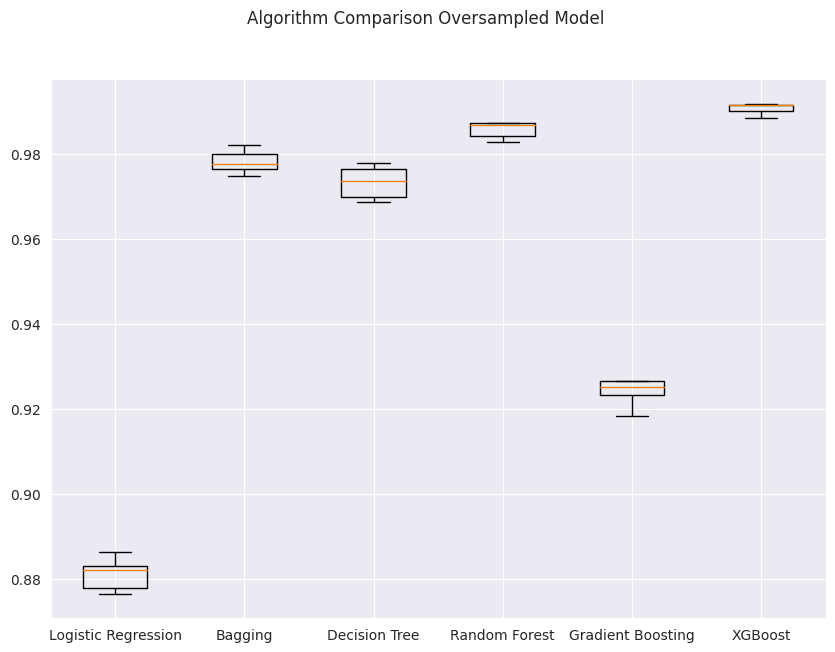

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Oversampled Model")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

Based on the boxplot comparing the cross-validation scores and validation performance of the oversampled models, we can make the following inferences :

- Logistic Regression: The boxplot shows that the cross-validation scores for logistic regression are relatively higher tahn the original model, indicating consistent performance across different folds. 

- Bagging, Decision Tree, Random Forest : These models exhibit similar boxplots, with relatively narrow IQRs. This indicates lower variability among different folds. The validation performance is slightly lower compared to the cross-validation scores. This suggests that these models might be slightly overfitting the training data.(learns the specific patterns and noise in the training data a little too well, resulting in lower performance on new, unseen data)

- XGBoost: The boxplot for XGBoost shows the highest median cross-validation score among all models, indicating consistently high performance across different folds. 

### Model Building with Undersampled data (trained data)



In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 888
Before UnderSampling, counts of label '0': 15112 

After UnderSampling, counts of label '1': 888
After UnderSampling, counts of label '0': 888 

After UnderSampling, the shape of train_X: (1776, 40)
After UnderSampling, the shape of train_y: (1776,) 



- Before under-sampling, the training data had 888 samples labeled as '1' (the minority class) and 15,112 samples labeled as '0' (the majority class). By applying under-sampling, the number of samples in both classes has been reduced to 888, resulting in a balanced class distribution.
- After under-sampling, the shape of the training data has changed, with train_X having a shape of (1776, 40) and train_y having a shape of (1776,) indicating that the corresponding labels have also been adjusted to match the new size of the training data.

***Student Note :***
*It's important to note that under-sampling reduces the amount of available training data, which can lead to a loss of information and potentially affect the model's overall performance.*

*Both over-sampling and under-sampling techniques aim to address class imbalance issue : Over-sampling increases the number of minority class samples, while under-sampling reduces the number of majority class samples.*

In [ ]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8513235574176348
Bagging: 0.8704627689963816
Decision Tree: 0.8468355233923697
Random Forest: 0.8975052370976957
Gradient Boosting: 0.8907446200723672
XGBoost: 0.8930108550752237

Validation Performance:

Logistic Regression: 0.8648648648648649
Bagging: 0.8918918918918919
Decision Tree: 0.8468468468468469
Random Forest: 0.8783783783783784
Gradient Boosting: 0.8873873873873874
XGBoost: 0.8918918918918919
CPU times: user 29 s, sys: 311 ms, total: 29.4 s
Wall time: 25.1 s


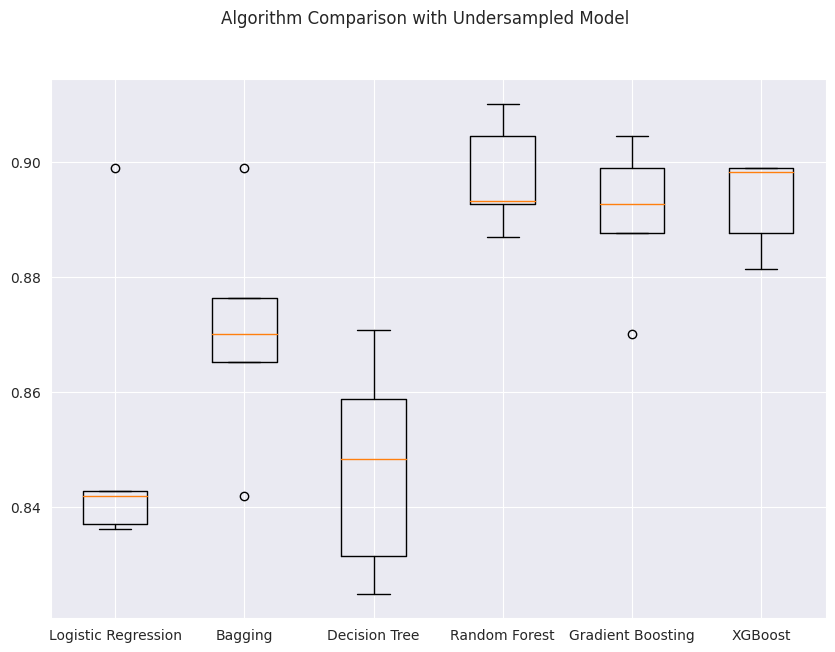

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Undersampled Model")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

Comparing the undersampled model to the original model, we can observe the following:
1. Cross-validation performance: The undersampled model generally showed higher cross-validation performance across all the evaluated algorithms compared to the original model. This indicates that the undersampled model performed better on the training data when using cross-validation.

2. Validation performance: The undersampled model also generally showed higher validation performance compared to the original model. This suggests that the undersampled model performs better when evaluated on the validation set, which provides an indication of its generalization ability.

## Best-performing models

<font color = 'blue'>To select the three best-performing models based on the goal of reducing false negatives and maximizing the recall score, we can compare the recall scores obtained from both the cross-validation performance and the validation performance for each model.</font>

Based on the provided recall scores, the three best-performing models and their scores are:

**1. XGBoost:**
- Recall on Cross-Validation (Original Data): 0.8108
- Recall on Validation (Original Data): 0.8153
- Recall on Cross-Validation (Oversampled Data): 0.9906 
- Recall on Validation (Oversampled Data): 0.8694
- Recall on Cross-Validation (Undersampled Data): 0.8930
- Recall on Validation (Undersampled Data): 0.8919

**2. Random Forest:**
- Recall on Cross-Validation (Original Data): 0.7196
- Recall on Validation (Original Data): 0.7432
- Recall on Cross-Validation (Oversampled Data): 0.9856
- Recall on Validation (Oversampled Data): 0.8559
- Recall on Cross-Validation (Undersampled Data): 0.8975
- Recall on Validation (Undersampled Data): 0.8784

**3. Gradient Boosting:**
- Recall on Cross-Validation (Original Data): 0.7173
- Recall on Validation (Original Data): 0.7432
- Recall on Cross-Validation (Oversampled Data): 0.9240
- Recall on Validation (Oversampled Data): 0.8829
- Recall on Cross-Validation (Undersampled Data): 0.8907 
- Recall on Validation (Undersampled Data): 0.8874



## HyperparameterTuning 

### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.


## Know the hyperparameters available for an algorithm

In [ ]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## **Tuning Random Forest Model**

### ***Using Original Data***

In [ ]:
%%time 

# defining model - RandomForest Hyperparameter Tuning
model_rf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_rf = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(5, 10), # larger values can help prevent overfitting
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], # strike a balance between randomness and stability in feature selection.
    "max_samples": np.arange(0.4, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'], #options 'balanced' and 'balanced_subsample' are suitable for handling imbalanced datasets
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
## fit the model on over sampled data training dataset (X_train, y_train)
randomized_cv.fit(X_train, y_train)  

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.003, 'max_samples': 0.6, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'} with CV score=0.8435091728559639
CPU times: user 13 s, sys: 432 ms, total: 13.4 s
Wall time: 12min 7s


In [ ]:
# Let's build a model with obtained best parameters - Original Data
tuned_rf = RandomForestClassifier(
    n_estimators= 250, min_samples_leaf= 8, min_impurity_decrease= 0.003, max_samples= 0.6, 
    max_features= "sqrt", class_weight= "balanced_subsample",random_state=1,
)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_samples=0.6,
                       min_impurity_decrease=0.003, min_samples_leaf=8,
                       n_estimators=250, random_state=1)

In [ ]:
#Checking the performance on the training set - Original dataset
print("Recall on train set")
tuned_rf_perf = model_performance_classification_sklearn(
    tuned_rf, X_train, y_train
)
tuned_rf_perf

Recall on train set


Accuracy  Recall  Precision     F1
0    0.9601  0.8908     0.5938 0.7126

In [ ]:
#Checking the performance on the validation set - Original dataset
print("Recall on validation set")
tuned_rf_val = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
tuned_rf_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9527  0.8468     0.5481 0.6655

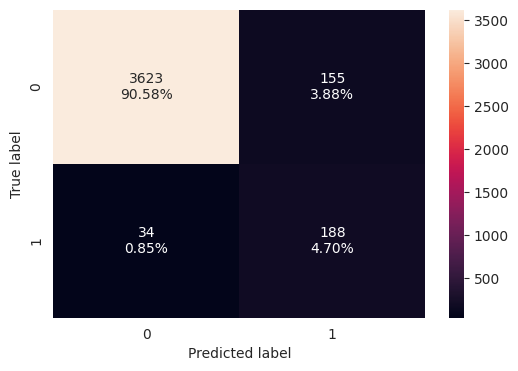

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_rf, X_val, y_val)

### ***Using Oversampled Data***

In [ ]:
%%time 

# defining model - RandomForest Hyperparameter Tuning
model_rf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_rf = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(5, 10), # larger values can help prevent overfitting
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], # strike a balance between randomness and stability in feature selection.
    "max_samples": np.arange(0.4, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'], #options 'balanced' and 'balanced_subsample' are suitable for handling imbalanced datasets
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
## fit the model on over sampled data training dataset (X_train_over, y_train_over)
randomized_cv.fit(X_train_over, y_train_over)  

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_samples': 0.5, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'} with CV score=0.9197326344047061
CPU times: user 22.3 s, sys: 558 ms, total: 22.8 s
Wall time: 19min 58s


In [ ]:
# Let's build a model with obtained best parameters - oversampled data
tuned_rf1 = RandomForestClassifier(
    n_estimators= 250, min_samples_leaf= 5, min_impurity_decrease= 0.001, max_samples= 0.5, 
    max_features= "sqrt", class_weight= "balanced_subsample",random_state=1,
)
tuned_rf1.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced_subsample', max_samples=0.5,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [ ]:
#Checking the performance on the oversampled training set
print("Recall on train set")
tuned_rf_os_perf = model_performance_classification_sklearn(
    tuned_rf1, X_train_over, y_train_over
)
tuned_rf_os_perf

Recall on train set


Accuracy  Recall  Precision     F1
0    0.9497  0.9229     0.9752 0.9484

In [ ]:
#Checking the performance on the validation set - oversampled dataset
print("Recall on validation set")
tuned_rf_os_val = model_performance_classification_sklearn(tuned_rf1, X_val, y_val)
tuned_rf_os_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9650  0.8784     0.6331 0.7358

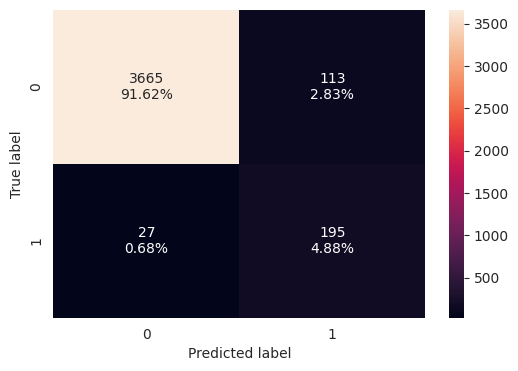

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_rf1, X_val, y_val)

### ***Using Undersampled Data***

In [ ]:
%%time 

# defining model - RandomForest Hyperparameter Tuning
model_rf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_rf = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(5, 10), # larger values can help prevent overfitting
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], # strike a balance between randomness and stability in feature selection.
    "max_samples": np.arange(0.4, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'], #options 'balanced' and 'balanced_subsample' are suitable for handling imbalanced datasets
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
## fit the model on over sampled data training dataset (X_train_un, y_train_un)
randomized_cv.fit(X_train_un, y_train_un)  

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_samples': 0.5, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'} with CV score=0.8897098965276455
CPU times: user 1.71 s, sys: 91 ms, total: 1.8 s
Wall time: 1min 38s


In [ ]:
# Let's build a model with obtained best parameters - undersampled data
tuned_rf2 = RandomForestClassifier(
    n_estimators= 200, min_samples_leaf= 5, min_impurity_decrease= 0.001, max_samples= 0.5, 
    max_features= "sqrt", class_weight= "balanced_subsample",random_state=1,
)
tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(class_weight='balanced_subsample', max_samples=0.5,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [ ]:
#Checking the performance on the undersampled training set
print("Recall on train set")
tuned_rf_us_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
tuned_rf_us_perf

Recall on train set


Accuracy  Recall  Precision     F1
0    0.9459  0.9133     0.9771 0.9441

In [ ]:
#Checking the performance on the validation set - undersampled dataset
print("Recall on validation set")
tuned_rf_us_val = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
tuned_rf_us_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9210  0.8829     0.4033 0.5537

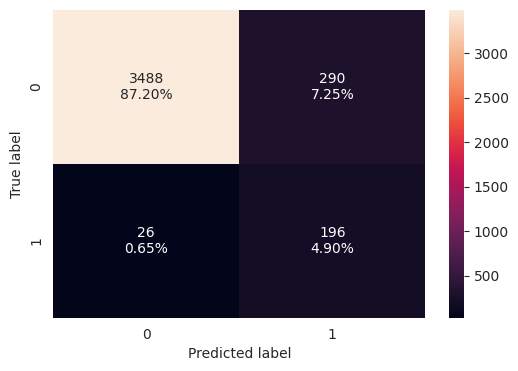

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_rf2, X_val, y_val)

**Observations and Inference**

- the accuracy and recall on the train set are slightly higher than on the validation set for the original and oversampled datasets, indicating some degree of overfitting. 
- the confusion matrix shows class imbalance. In all cases (original data, oversampled data, and undersampled data), the majority class (non-failures) has a significantly higher count than the minority class (failures). It is obvius that the count of non-failures (TN and FP) is significantly higher than the count of failures (TP and FN) in all cases.
- Eg: Confusion Matrix on validation set Random Forest (Original Data): count of non-failures (TN and FP) is 3623 + 34 = 3657, while the count of failures (TP and FN) is 188 + 155 = 343.
- the recall on the validation set for the original data is (84.68%) indicating that the model is able to correctly identify 84.68% of the actual failures in the validation set, considering the class imbalance.
- the recall on the validation set for the oversampled data is (87.84%). By addressing class imbalance through oversampling, the recall has improved compared to the original data. 

Conclusion :
- Using Random Forest tuning, the oversampled data seems to achieve a better balance between recall, false negatives, and false positives compared to the other datasets. It demonstrates a higher recall and relatively low counts of false negatives and false positives (indicating improvd perfrmance in identifying actual failures while minimizing the risk of missed failures and high inspection costs)

## **Tuning Gradient Boosting Model**

### ***Using Original Data***

In [ ]:
%%time 

# defining model - Gradient Boosting Tuning
model_gb = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid_gb={
    "n_estimators":[100, 200, 250], #number of ensemble sizes or trees to build.
    "learning_rate": [0.01, 0.1, 0.5], #chosen a relatively lower learning rate for better generalization and less overfitting
    "subsample":[0.7,0.8,1.0], #fraction of sample % used for training each tree
    "max_depth": [3, 5, 7],  #Maximum depth of the individual trees
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'], #given the large dataset size 20,000, using a smaller fraction reduce the risk of overfitting and strike a balance between randomness and stability in feature selection
    "min_samples_split": [2, 5, 10], #Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4]  #Minimum number of samples required at each leaf node
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_gb, param_distributions=param_grid_gb, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1} with CV score=0.7917412556338475
CPU times: user 18.4 s, sys: 322 ms, total: 18.7 s
Wall time: 11min 17s


In [ ]:
# Let's build a model with obtained best parameters
tuned_gb = GradientBoostingClassifier(
    subsample = 1.0, n_estimators = 250, min_samples_split = 10, min_samples_leaf =2, 
    max_features ='sqrt', max_depth = 5, learning_rate =0.1, random_state =1,
)
tuned_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=10, n_estimators=250,
                           random_state=1)

In [ ]:
#Checking the performance on the original training set
print("Recall on train set")
tuned_gb_perf = model_performance_classification_sklearn(
    tuned_gb, X_train, y_train
)
tuned_gb_perf

Recall on train set


Accuracy  Recall  Precision     F1
0    1.0000  1.0000     1.0000 1.0000

In [ ]:
#Checking the performance on the original validation set

print("Recall on validation set")
tuned_gb_val = model_performance_classification_sklearn(tuned_gb, X_val, y_val)
tuned_gb_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9860  0.7928     0.9462 0.8627

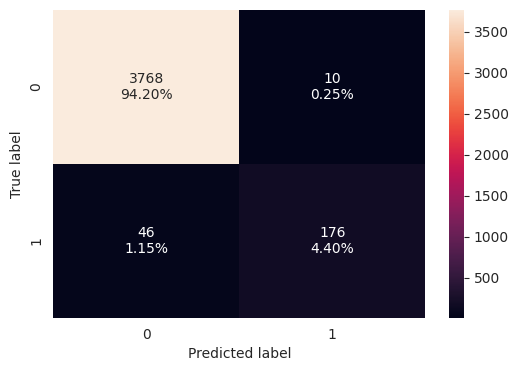

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gb, X_val, y_val)

### ***Using Oversampled Data***

In [ ]:
%%time 

# defining model - Gradient Boosting Tuning
model_gb = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid_gb={
    "n_estimators":[100, 200, 250], #number of ensemble sizes or trees to build.
    "learning_rate": [0.01, 0.1, 0.5], #chosen a relatively lower learning rate for better generalization and less overfitting
    "subsample":[0.7,0.8,1.0], #fraction of sample % used for training each tree
    "max_depth": [3, 5, 7],  #Maximum depth of the individual trees
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'], #given the large dataset size 20,000, using a smaller fraction reduce the risk of overfitting and strike a balance between randomness and stability in feature selection
    "min_samples_split": [2, 5, 10], #Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4]  #Minimum number of samples required at each leaf node
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_gb, param_distributions=param_grid_gb, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.5} with CV score=0.9905372291365142
CPU times: user 35.3 s, sys: 584 ms, total: 35.9 s
Wall time: 21min 52s


In [ ]:
# Let's build a model with obtained best parameters
tuned_gb1 = GradientBoostingClassifier(
    subsample = 1.0, n_estimators = 250, min_samples_split = 10, min_samples_leaf =2, 
    max_features ='sqrt', max_depth = 5, learning_rate =0.5, random_state =1,
)
tuned_gb1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=10,
                           n_estimators=250, random_state=1)

In [ ]:
#Checking the performance on the training set - oversampled data
tuned_gb_os_perf = model_performance_classification_sklearn(
    tuned_gb1, X_train_over, y_train_over
)
tuned_gb_os_perf

Accuracy  Recall  Precision     F1
0    1.0000  1.0000     1.0000 1.0000

In [ ]:
#Checking the performance on the validation set - oversampled data
tuned_gb_os_val = model_performance_classification_sklearn(tuned_gb1, X_val, y_val)
tuned_gb_os_val

Accuracy  Recall  Precision     F1
0    0.9855  0.8649     0.8727 0.8688

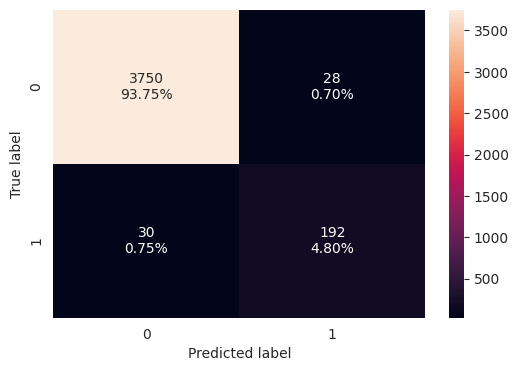

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gb1, X_val, y_val)

### ***Using Undersampled Data***

In [ ]:
%%time 

# defining model - Gradient Boosting Tuning
model_gb = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid_gb={
    "n_estimators":[100, 200, 250], #number of ensemble sizes or trees to build.
    "learning_rate": [0.01, 0.1, 0.5], #chosen a relatively lower learning rate for better generalization and less overfitting
    "subsample":[0.7,0.8,1.0], #fraction of sample % used for training each tree
    "max_depth": [3, 5, 7],  #Maximum depth of the individual trees
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'], #given the large dataset size 20,000, using a smaller fraction reduce the risk of overfitting and strike a balance between randomness and stability in feature selection
    "min_samples_split": [2, 5, 10], #Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4]  #Minimum number of samples required at each leaf node
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_gb, param_distributions=param_grid_gb, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.5} with CV score=0.9088110201231512
CPU times: user 1.62 s, sys: 51.7 ms, total: 1.67 s
Wall time: 1min 18s


In [ ]:
# Let's build a model with obtained best parameters
tuned_gb2 = GradientBoostingClassifier(
    subsample = 0.7, n_estimators = 200, min_samples_split = 2, min_samples_leaf =4, 
    max_features ='sqrt', max_depth = 5, learning_rate =0.5, random_state =1,
)
tuned_gb2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=200, random_state=1,
                           subsample=0.7)

In [ ]:
#Checking the performance on the training set - undersampled data
tuned_gb_us_perf = model_performance_classification_sklearn(
    tuned_gb2, X_train_un, y_train_un
)
tuned_gb_us_perf

Accuracy  Recall  Precision     F1
0    1.0000  1.0000     1.0000 1.0000

In [ ]:
#Checking the performance on the validation set - undersampled dataset
print("Recall on validation set")
tuned_gb_us_val = model_performance_classification_sklearn(tuned_gb2, X_val, y_val)
tuned_gb_us_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9525  0.8829     0.5444 0.6735

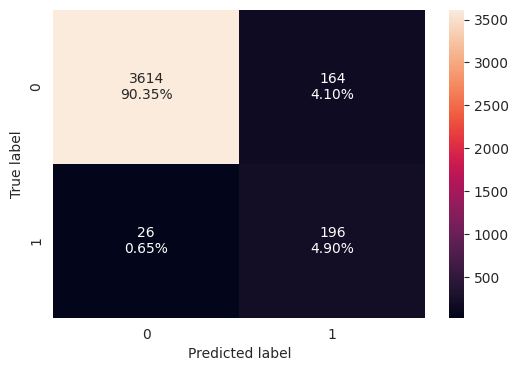

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gb2, X_val, y_val)

**Observations**

- Original Data: The Gradient Boosting model trained on the original data demonstrates perfect accuracy, recall, precision, and F1 score. On the validation set, it achieves a high accuracy of 98.6%, indicating strong overall performance. The recall on the validation set is 79.28%, indicating that the model correctly identifies 79.28% of the actual failures. The precision and F1 score are also relatively high, indicating good balance between true positives and false positives.
- Oversampled Data: The model trained on the oversampled data also achieved a perfect score on the training set. On the validation set, it maintained a high accuracy of 0.9855 and showed improved recall of 0.8649 compared to the model trained on the original data. This means it correctly identifies 86.49% of the actual failures. The precision, although slightly lower than recall, is still relatively high, resulting in a balanced F1 score.
- Undersampled Data: Similar to the above two, the model trained on the undersampled data achieved perfect scores on the training set aas well. On the validation set, it showed a slightly lower accuracy of 0.9525 compared to the other models. The recall is 0.8829, indicating that it correctly identifies 88.29% of the actual failures. However, the precision and F1 score are lower than the other models, suggesting a higher number of false positives (means that the model is predicting failures where there are none. This can lead to unnecessary maintenance or inspection costs)

## **Tuning XGBoost Model**

### ***Using Original Data***

In [ ]:
%%time 

# defining model - XGBoost Hyperparameter Tuning
model_xgb = XGBClassifier(random_state=1,eval_metric='logloss')

#have used parameter tree_method : gpu_hist after few long processing time taken (>56min)
param_grid_xgb ={
    'tree_method' :['gpu_hist'],
    'n_estimators':[150,200,250], #range of options to explore different ensemble sizes
    'scale_pos_weight':[1,2], #useful for handling class imbalance
    'subsample':[0.9,1], #fraction of samples used for training each tree
    'learning_rate':[0.01, 0.1, 0.5], #cover a range from low to high learning rates to find optimal bal btwn model complexity & performance
    'gamma':[0,3,5], #low and high values - controls the minimum loss reduction required for a split
    "colsample_bytree": [0.8, 0.9], #control the fraction of features (columns) to be randomly sampled for each tree 
    "colsample_bylevel": [0.9, 1] #and each level
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid_xgb, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'tree_method': 'gpu_hist', 'subsample': 1, 'scale_pos_weight': 2, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9, 'colsample_bylevel': 1} with CV score=0.8277534437884846
CPU times: user 2.39 s, sys: 410 ms, total: 2.8 s
Wall time: 2min 31s


In [ ]:
# Let's build a model with obtained best parameters
tuned_xgb = XGBClassifier(
    tree_method ='gpu_hist', 
    subsample = 1, 
    scale_pos_weight = 2, 
    n_estimators = 250, 
    learning_rate = 0.1, 
    gamma = 0, 
    colsample_bytree = 0.9, 
    colsample_bylevel = 1,
    random_state =1
)
tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
#Checking the performance on the original training set
print("Recall on train set")
tuned_xgb_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train, y_train
)
tuned_xgb_perf

Recall on train set


Accuracy  Recall  Precision     F1
0    1.0000  1.0000     1.0000 1.0000

In [ ]:
#Checking the performance on the original validation set
print("Recall on validation set")
tuned_xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9895  0.8333     0.9737 0.8981

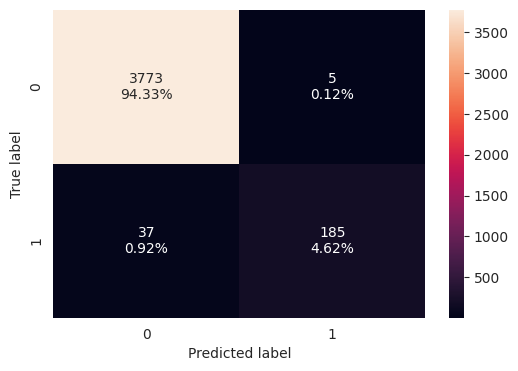

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb, X_val, y_val)

### ***Using Oversampled Data***

In [ ]:
%%time 

# defining model - XGBoost Hyperparameter Tuning
model_xgb = XGBClassifier(random_state=1,eval_metric='logloss')

param_grid_xgb ={
    'tree_method' :['gpu_hist'],
    'n_estimators':[150,200,250], #range of options to explore different ensemble sizes
    'scale_pos_weight':[1,2], #useful for handling class imbalance
    'subsample':[0.9,1], #fraction of samples used for training each tree
    'learning_rate':[0.01, 0.1, 0.5], #cover a range from low to high learning rates to find optimal bal btwn model complexity & performance
    'gamma':[0,3,5], #low and high values - controls the minimum loss reduction required for a split
    "colsample_bytree": [0.8, 0.9], #control the fraction of features (columns) to be randomly sampled for each tree 
    "colsample_bylevel": [0.9, 1] #and each level
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid_xgb, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'tree_method': 'gpu_hist', 'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 150, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 1} with CV score=0.9933827858029977
CPU times: user 2.52 s, sys: 224 ms, total: 2.75 s
Wall time: 3min 13s


In [ ]:
# Let's build a model with obtained best parameters
tuned_xgb1 = XGBClassifier(
    tree_method ='gpu_hist', 
    subsample = 0.9, 
    scale_pos_weight = 2, 
    n_estimators = 150, 
    learning_rate = 0.5, 
    gamma = 0, 
    colsample_bytree = 0.8, 
    colsample_bylevel = 1,
    random_state =1
)

tuned_xgb1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
#Checking the performance on the training set - oversampled data
tuned_xgb_os_perf = model_performance_classification_sklearn(tuned_xgb1, X_train_over, y_train_over)
tuned_xgb_os_perf

Accuracy  Recall  Precision     F1
0    1.0000  1.0000     1.0000 1.0000

In [ ]:
#Checking the performance on the validation set - oversampled data
tuned_xgb_os_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
tuned_xgb_os_val

Accuracy  Recall  Precision     F1
0    0.9872  0.8739     0.8940 0.8838

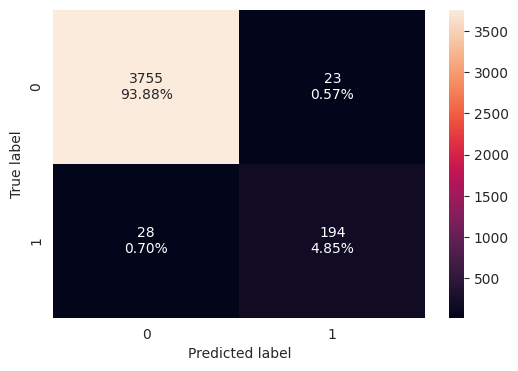

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb1, X_val, y_val)

### ***Using Undersampled Data***

In [ ]:
%%time 

# defining model - XGBoost Hyperparameter Tuning
model_xgb = XGBClassifier(random_state=1,eval_metric='logloss')

param_grid_xgb ={
    'tree_method' :['gpu_hist'],
    'n_estimators':[150,200,250], #range of options to explore different ensemble sizes
    'scale_pos_weight':[1,2], #useful for handling class imbalance
    'subsample':[0.9,1], #fraction of samples used for training each tree
    'learning_rate':[0.01, 0.1, 0.5], #cover a range from low to high learning rates to find optimal bal btwn model complexity & performance
    'gamma':[0,3,5], #low and high values - controls the minimum loss reduction required for a split
    "colsample_bytree": [0.8, 0.9], #control the fraction of features (columns) to be randomly sampled for each tree 
    "colsample_bylevel": [0.9, 1] #and each level
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid_xgb, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'tree_method': 'gpu_hist', 'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 3, 'colsample_bytree': 0.8, 'colsample_bylevel': 1} with CV score=0.9133180981400368
CPU times: user 1.6 s, sys: 107 ms, total: 1.71 s
Wall time: 1min 58s


In [ ]:
# Let's build a model with obtained best parameters
tuned_xgb2 = XGBClassifier(
    tree_method ='gpu_hist', 
    subsample = 0.9, 
    scale_pos_weight = 2, 
    n_estimators = 200, 
    learning_rate = 0.1, 
    gamma = 3, 
    colsample_bytree = 0.8, 
    colsample_bylevel = 1,
    random_state =1
)

tuned_xgb2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
#Checking the performance on the training set - undersampled data
tuned_xgb_us_perf = model_performance_classification_sklearn(
    tuned_xgb2, X_train_un, y_train_un
)
tuned_xgb_us_perf

Accuracy  Recall  Precision     F1
0    0.9887  0.9854     0.9921 0.9887

In [ ]:
#Checking the performance on the validation set - undersampled dataset
print("Recall on validation set")
tuned_xgb_us_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
tuned_xgb_us_val

Recall on validation set


Accuracy  Recall  Precision     F1
0    0.9140  0.9009     0.3831 0.5376

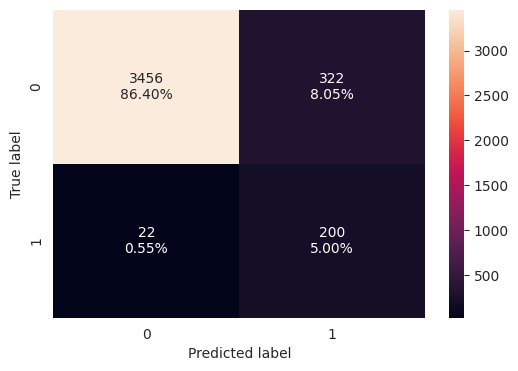

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb2, X_val, y_val)


**Observations**
1. Original Data
- The XGBoost model has performed exceptionally well on the original data, achieving high accuracy, recall, precision, and F1 scores.
- It has a high recall on the validation set (0.8333), indicating that it can effectively identify actual failures.
- The precision on the validation set (0.9737) is also high, suggesting a good balance between true positives and false positives.
2. Oversampled DAta
- XGBoost model maintained high performance on the oversampled data, with high accuracy, recall, precision, and F1 scores.
- It achieved a slightly lower recall on the validation set (0.8739) compared to the original data, but it still effectively identifies actual failures.
- The precision on the validation (0.8940) remains high, indicating again a good balance between true positives and false positives.
3. Undersampled DAta
- Model performs well on the undersampled data, but its performance is slightly lower compared to the original and oversampled data.
- Achieved a relatively lower recall on the validation set (0.9009) compared to the original and oversampled data, suggesting a slight decrease in the ability to identify actual failures correctly.
- The precision on the validation set (0.3831) is also lower, indicating a higher number of false positives.

Overall, the XGBoost model has demonstrated strong performance across all data sets, effectively identifying failures with high recall and maintaining a good balance between true positives and false positives. ***The model performs particularly well on the original and oversampled data***, while its performance is slightly compromised on the undersampled data.

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_rf_perf.T,
        tuned_rf_os_perf.T,
        tuned_rf_us_perf.T,
        tuned_gb_perf.T,
        tuned_gb_os_perf.T,
        tuned_gb_us_perf.T,
        tuned_xgb_perf.T,
        tuned_xgb_os_perf.T,   
        tuned_xgb_us_perf.T,      
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Original Data",
    "Random Forest Tuned with Oversampled Data",
    "Random Forest Tuned with Undersampled Data",
    "Gradient Boosting Tuned with Original Data",
    "Gradient Boosting Tuned with Oversampled Data",
    "Gradient Boosting Tuned with Undersampled Data",
    "XGBoost Tuned with Original Data",
    "XGBoost Tuned with Oversampled Data",
    "XGBoost Tuned with Undersampled Data",
]
print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


Random Forest Tuned with Original Data  \
Accuracy                                   0.9601   
Recall                                     0.8908   
Precision                                  0.5938   
F1                                         0.7126   

           Random Forest Tuned with Oversampled Data  \
Accuracy                                      0.9497   
Recall                                        0.9229   
Precision                                     0.9752   
F1                                            0.9484   

           Random Forest Tuned with Undersampled Data  \
Accuracy                                       0.9459   
Recall                                         0.9133   
Precision                                      0.9771   
F1                                             0.9441   

           Gradient Boosting Tuned with Original Data  \
Accuracy                                       1.0000   
Recall                                         1.0000   
Precision                                      1.0000   
F1                                             1.0000   

           Gradient Boosting Tuned with Oversampled Data  \
Accuracy                                          1.0000   
Recall                                            1.0000   
Precision                                         1.0000   
F1                                                1.0000   

           Gradient Boosting Tuned with Undersampled Data  \
Accuracy                                           1.0000   
Recall                                             1.0000   
Precision                                          1.0000   
F1                                                 1.0000   

           XGBoost Tuned with Original Data  \
Accuracy                             1.0000   
Recall                               1.0000   
Precision                            1.0000   
F1                                   1.0000   

           XGBoost Tuned with Oversampled Data  \
Accuracy                                1.0000   
Recall                                  1.0000   
Precision                               1.0000   
F1                                      1.0000   

           XGBoost Tuned with Undersampled Data  
Accuracy                                 0.9887  
Recall                                   0.9854  
Precision                                0.9921  
F1                                       0.9887

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_rf_val.T,
        tuned_rf_os_val.T,
        tuned_rf_us_val.T,
        tuned_gb_val.T,
        tuned_gb_os_val.T,
        tuned_gb_us_val.T,
        tuned_xgb_val.T,
        tuned_xgb_os_val.T,   
        tuned_xgb_us_val.T, 
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest Tuned with Original Data",
    "Random Forest Tuned with Oversampled Data",
    "Random Forest Tuned with Undersampled Data",
    "Gradient Boosting Tuned with Original Data",
    "Gradient Boosting Tuned with Oversampled Data",
    "Gradient Boosting Tuned with Undersampled Data",
    "XGBoost Tuned with Original Data",
    "XGBoost Tuned with Oversampled Data",
    "XGBoost Tuned with Undersampled Data",
]
print("Validation Performance Comparison:")
models_val_comp_df

Validation Performance Comparison:


Random Forest Tuned with Original Data  \
Accuracy                                   0.9527   
Recall                                     0.8468   
Precision                                  0.5481   
F1                                         0.6655   

           Random Forest Tuned with Oversampled Data  \
Accuracy                                      0.9650   
Recall                                        0.8784   
Precision                                     0.6331   
F1                                            0.7358   

           Random Forest Tuned with Undersampled Data  \
Accuracy                                       0.9210   
Recall                                         0.8829   
Precision                                      0.4033   
F1                                             0.5537   

           Gradient Boosting Tuned with Original Data  \
Accuracy                                       0.9860   
Recall                                         0.7928   
Precision                                      0.9462   
F1                                             0.8627   

           Gradient Boosting Tuned with Oversampled Data  \
Accuracy                                          0.9855   
Recall                                            0.8649   
Precision                                         0.8727   
F1                                                0.8688   

           Gradient Boosting Tuned with Undersampled Data  \
Accuracy                                           0.9525   
Recall                                             0.8829   
Precision                                          0.5444   
F1                                                 0.6735   

           XGBoost Tuned with Original Data  \
Accuracy                             0.9895   
Recall                               0.8333   
Precision                            0.9737   
F1                                   0.8981   

           XGBoost Tuned with Oversampled Data  \
Accuracy                                0.9872   
Recall                                  0.8739   
Precision                               0.8940   
F1                                      0.8838   

           XGBoost Tuned with Undersampled Data  
Accuracy                                 0.9140  
Recall                                   0.9009  
Precision                                0.3831  
F1                                       0.5376

**Observations**

Based on the goal of maximizing the prediction of generator failures and minimizing false negatives (missed failures), the evaluation metric of interest is Recall.

XGBoost (Undersampled Data) achieves the highest Recall value of 0.9009. Therefore, based on the given performance comparison and the goal of maximizing Recall, **XGBoost with undersampled data is the recommended final model for predicting generator failures on the test data**


### **Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
print("XGBoost Tuned with Undersampled Test Data Performance:")
xgb_grid_test = model_performance_classification_sklearn(tuned_xgb2, X_test, y_test)
xgb_grid_test

XGBoost Tuned with Undersampled Test Data Performance:


Accuracy  Recall  Precision     F1
0    0.9206  0.8830     0.4062 0.5564

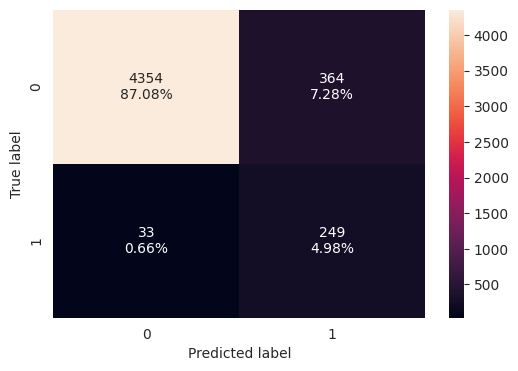

In [ ]:
confusion_matrix_sklearn(tuned_xgb2, X_test, y_test)


**Observations**

From the performance of the final XGBoost model on the test set, we can make the following inferences :

- Accuracy: The final XGBoost model achieves an accuracy of 0.9206 on the test set. This indicates that the model correctly predicts approximately 92.06% of the instances in the test set.

- Recall: The recall of the final XGBoost model is 0.8830, indicating that it correctly identifies approximately 88.30% of the actual generator failures in the test set. This is an improvement compared to the recall values of the other models.

- Precision: The precision of the final XGBoost model is 0.4062, which means that out of all the instances predicted as failures by the model, only approximately 40.62% of them are actually true positives. This is a lower precision value compared to some of the other models, indicating a higher number of false positives.

- F1 Score: The F1 score of the final XGBoost model is 0.5564, which is a harmonic mean of precision and recall. It provides a balanced measure of the model's overall performance. The F1 score takes into account both the precision and recall, and a higher value indicates a better trade-off between these two metrics.

***Conclusion : The undersampled tuned XGBoost model has generalized well on the testing data.***

### Feature Importances 

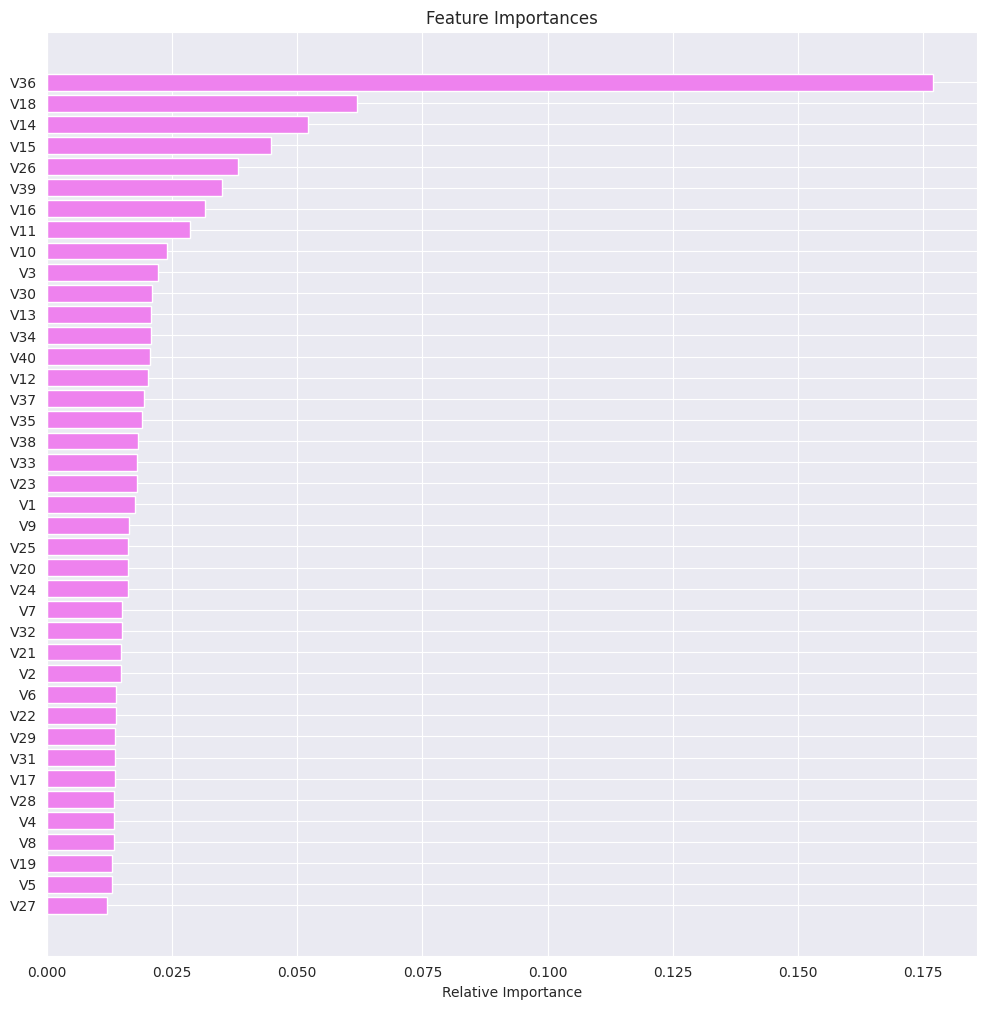

In [ ]:
feature_names = X_train.columns
importances = tuned_xgb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
- V36 has the most influence on the model's predictions or performance
- Other top 5 important features are V18, V14,V15, V26 and V39.
- Least importance are V4, V8, V19, V5 and V27
- Since the features are unknown, not much info can be provided further.

## Let's use Pipelines to build the final model


- Since we have only one datatype in the data, we don't need to use column transformer here

In [ ]:
#Building a pipeline model with the best model
model_pipeline = Pipeline(
    steps=[
        (
            "XGBoost Tuned with Undersampled Data",
            XGBClassifier(
    tree_method ='gpu_hist', 
    subsample = 0.9, 
    scale_pos_weight = 2, 
    n_estimators = 200, 
    learning_rate = 0.1, 
    gamma = 3, 
    colsample_bytree = 0.8, 
    colsample_bylevel = 1,
    random_state =1
                ),
        ),
    ]
)

In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test
X_test1 = df_test.drop(columns="Target")  #drop target variable from test data
y_test1 = df_test["Target"]               #store target variable in y_test1

In [ ]:
# We can't undersample data without doing missing value treatment,
# so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
#X2 = imputer.fit_transform(X_test1)

## Performing undersampling based on the final model chosen.

In [ ]:
# code for undersampling on the data
# Using RandomUnderSampler technique

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# fit the pipeline model obtained from above step
model_pipeline.fit(X_train_un, y_train_un)

Pipeline(steps=[('XGBoost Tuned with Undersampled Data',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=1, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=3, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=1, ...))])

In [ ]:
#Checking the performance of the pipeline on test set

model_pipeline_test = model_performance_classification_sklearn(model_pipeline, X_test1,y_test1)
model_pipeline_test

Accuracy  Recall  Precision     F1
0    0.9206  0.8830     0.4062 0.5564

**Observations** 
- The XGBoost model with undersampled data in production, shows a recall score of 0.8830. 
- The undersampled tuned XGBoost model has generalized well on the testing data.

# Business Insights and Conclusions

1. Since the primary objective is to minimize false negatives (missed failures), a model with higher recall will identify a higher percentage of actual failures, reducing the chances of unexpected generator breakdowns. In this case, the XGBoost model tuned data appears to have the highest recall, making it a strong candidate for the final model, to be deployed into production environment.
2. Cost Considerations: Analyze the cost implications of different prediction outcomes. Repairing a generator (true positive) is generally less expensive than replacing a generator (false negative). Additionally, inspecting a generator (false positive) incurs lower costs compared to repairing or replacing. Consider the cost trade-offs when determining the optimal prediction threshold.
3. Maintenance Strategy: Implement a proactive maintenance strategy based on the model's predictions to schedule timely repairs for generators that are at a higher risk of failure. By identifying failures in advance, the company can minimize downtime and reduce overall maintenance costs.
4. Continuous Improvement: Renewind should collect additional data and refine the model over time. As the company collects more sensor data and accumulates failure instances, retraining the model periodically to improve its accuracy and predictive capabilities would be necessary/important. Staying updated with advancement in machine learning algorithms and integration to real-time computer based systems like SCADA and techniques to enhance the model's performance will be beneficial.
5. Feature Importance: Though the data are ciphered, we know from the feature importance that V36 has the most influence on the model's predictions or performance of generator failures. It is crucial therefore to thoroughly understand and monitor this feature, investigate its relationship with generator failures and explore ways to gather more accurate or comprehensive data related to V36. This information can help identify critical factors that contribute to failures and guide maintenance and monitoring efforts.




---



# <font color="blue"> **APPENDIX - STUDENT NOTES**

## **1. Imputer**

In terms of handling missing values in the Train and Test datasets, it is generally recommended to use separate Imputer. Reasons are :

- Separate Imputer fits the imputer on the training data and reuses the median values calculated from the training data to transform the validation and test data. This approach ensures consistency in imputation, as the same median values from the training data are used for imputing missing values in both the validation and test data.
- By using the same imputer instance and reusing the median values, it avoids re-estimating the median values on the validation and test data, which can help prevent data leakage and produce more reliable results.
- Separate Impute approach follows the principle of treating the validation and test data as unseen data, and any transformations or imputations should be based on the training data only.
- Using imputer = SimpleImputer(strategy="median") fits the imputer separately on each dataset (training, validation, and test) and calculates the median values for each dataset. This can potentially introduce inconsistency in imputation, as the median values may vary across datasets.
- Therefore, it is generally recommended to use a separate Imputer as per in the Missing Value treatment, where the imputer is fitted on the training data and the same imputer instance and median values are used to transform the validation and test data. This ensures consistency and avoids data leakage, which is important for reliable model evaluation and performance estimation.
- If the missing values in the Train and Test datasets are in different columns, we can modify the code using imp_median = SimpleImputer(strategy='median') and identify the columns with missing values *'in each dataset'* as below

      train_cols_with_missing = X_train.columns[X_train.isnull().any()].tolist()


## **2. Links for further Reading**




1. [Best Tools for Model Tuning and Hyperparameter Optimization](https://neptune.ai/blog/best-tools-for-model-tuning-and-hyperparameter-optimization#:~:text=A%20better%20alternative%20is%20RandomSearch,values%20are%20the%20best%20combination.)
2. [Hyperparameter Tuning in Python: a Complete Guide](https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide)
3. [A Comprehensive Guide on Hyperparameter Tuning and its Techniques](https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/)
4. [Mastering XGBoost Parameter Tuning: A Complete Guide with Python Codes](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
5. [Speed up XGBoost model training](https://www.anyscale.com/blog/three-ways-to-speed-up-xgboost-model-training)